# Twitter Sentiment Analysis


*Notes : This research is prepared to crawl tweets from Twitter for sentiment analysis regarding Prabowo-Gibran as the presidential and vice-presidential candidates in the 2024 Indonesian election.*

*Prepared by* : **Achmad Dhani & Faris Arief Mawardi**

## I. Introduction

**Background:**

The sentiment analysis aims to gauge public opinion and feelings expressed on social media platforms, specifically Twitter, regarding these candidates' current political alliance and their active participation in the ongoing election campaign, leading up to the presidential and vice-presidential election scheduled for February 2024.

### 5W1H Key Factors:

**Who:**
- Prabowo Subianto and Gibran Rakabuming Raka, potential presidential and vice-presidential candidates.
- Twitter users expressing opinions and sentiments about these potential candidates.

**What:**
- Sentiment analysis on Twitter data discussing the alliance and active participation of Prabowo and Gibran in the 2024 Indonesian election.
- Gathering tweets, analyzing the sentiment expressed, and understanding public opinion regarding this political alliance.

**When:**
- During the campaign leading up to the 2024 Indonesian election.
- Period of data collection is November 15th - December 15th of 2023.

**Where:**
- Twitter platform, particularly tweets written in Bahasa Indonesia, discussing #PrabowoGibran2024 or related hashtags.

**Why:**
- To understand public sentiment, feelings, and opinions toward the candidacy of Prabowo and Gibran.
- To provide insights into the potential political alliance's reception among the electorate.

**How:**
- Collecting tweets related to #PrabowoGibran2024 and conducting sentiment analysis.
- Using Natural Language Processing (NLP) techniques to analyze the sentiment of tweets.
- Aggregating data, processing, and interpreting sentiment scores to derive insights.


**Problem Statement:**

Analyzing the sentiment polarity and intensity of Twitter discussions surrounding the Prabowo-Gibran alliance in preparation for the 2024 Indonesian election. The objective is to comprehend how public sentiment might impact their candidacy and overall political prospects as they actively engage in the ongoing election campaign leading up to the presidential and vice-presidential election scheduled for February 2024.

# II. Import Libraries and Packages

*Importing Libraries and Packages for the modules to be used in this project.*

In [1]:
!pip install tensorflow_hub


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install wordcloud


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install tensorflow


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# String operations using regular expressions
import re

# Natural Language Toolkit (NLTK) for natural language processing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# String module for string-related functions such as letter constants and punctuation
import string

# NumPy for array support and matrix operations
import numpy as np

# Pandas for data manipulation and analysis
import pandas as pd

# Seaborn for data visualization based on Matplotlib
import seaborn as sns

# Matplotlib for data visualization
import matplotlib.pyplot as plt

# TensorFlow for machine learning and deep learning
import tensorflow as tf
import tensorflow_hub as tf_hub

# Functions and classes from scikit-learn for data splitting, vectorization, and evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Warnings to control notification behavior
import warnings
warnings.filterwarnings('ignore')

# Components of the Keras API in TensorFlow
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Bidirectional, Dropout, BatchNormalization, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import TextVectorization

# WordCloud for visual representation of word frequencies in text
from wordcloud import WordCloud

# Counter module to count elements in a list
from collections import Counter

# Set of stopwords from NLTK used in natural language processing
from nltk.corpus import stopwords as nltk_stopwords

nltk.download('stopwords')
nltk.download('punkt')
!pip install pysastrawi

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Fariskoms\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Fariskoms\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# III. Data Loading

*Loading the dataset to be used in this project.*

In [5]:
# Loading November datasets
nov15=pd.read_csv("cleaned_15112023.csv",delimiter=',')
nov16=pd.read_csv("cleaned_16112023.csv",delimiter=',')
nov17=pd.read_csv('cleaned_17112023.csv',delimiter=',')
nov18=pd.read_csv('cleaned_18112023.csv',delimiter=',')
nov19=pd.read_csv('cleaned_19112023.csv',delimiter=',')
nov20=pd.read_csv('cleaned_20112023.csv',delimiter=',')
nov21=pd.read_csv('cleaned_21112023.csv',delimiter=',')
nov22=pd.read_csv('cleaned_22112023.csv',delimiter=',')
nov23=pd.read_csv('cleaned_23112023.csv',delimiter=',')
nov24=pd.read_csv('cleaned_24112023.csv',delimiter=',')
nov25=pd.read_csv('cleaned_25112023.csv',delimiter=',')
nov26=pd.read_csv('cleaned_26112023.csv',delimiter=',')
nov27=pd.read_csv('cleaned_27112023.csv',delimiter=',')
nov28=pd.read_csv('cleaned_28112023.csv',delimiter=',')
nov29=pd.read_csv('cleaned_29112023.csv',delimiter=',')
nov30=pd.read_csv('cleaned_30112023.csv',delimiter=',')

In [6]:
# Combining November Datasets
data_nov = pd.concat([nov15,nov16,nov17,nov18,nov19,nov20,nov21,nov22,nov23,nov24,nov25,nov26,nov27,nov28,nov29,nov30], ignore_index=True)
data_nov

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,VerifiedStatus,FollowersCount,sentiment_label,sentiment_score,hashtag
0,2023-11-15 23:59:49+00:00,1724940299250827575,@xquitavee @prabowo @gibran_tweet @psi_id @jok...,0,0,0,0,in,1420228891994517507,1724591423444713876,AmirMah36541437,https://twitter.com/AmirMah36541437/status/172...,Not Verified,Follower Count Not Found,netral,0,[]
1,2023-11-15 23:59:18+00:00,1724940167767785893,@yehovarapha_ Boleh gak mutualan sama pendukun...,0,0,0,0,in,781527721,1724770699737444761,numadayana,https://twitter.com/numadayana/status/17249401...,Not Verified,10.5K,negatif,-1,[]
2,2023-11-15 23:59:00+00:00,1724940091058163837,Nurul Arifin Apresiasi Keputusan KPU Atas Pene...,0,0,49,11,in,721898354502930433,1724940091058163837,golkarpedia,https://twitter.com/golkarpedia/status/1724940...,Not Verified,"2,306",netral,0,"['#airlanggahartarto', '#kuningkeren', '#Prabo..."
3,2023-11-15 23:58:29+00:00,1724939961080991996,@uludagerdi @hariqosatria @prabowo @gibran_twe...,0,0,0,0,in,891872532,1723518365321568366,hagj12,https://twitter.com/hagj12/status/172493996108...,Not Verified,Follower Count Not Found,netral,0,[]
4,2023-11-15 23:56:01+00:00,1724939341246697524,Saatnya Rakyat memilih untuk Indonesia....Prog...,0,2,9,22,in,1227499861580251136,1724939341246697524,Lembayung071,https://twitter.com/Lembayung071/status/172493...,Not Verified,12.2K,positif,1,['#PrabowoGibran2024']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4584,2023-11-30 15:21:18+00:00,1730245627802751073,@gibran_gen Kompak terus Pasangan Prabowo Gibr...,0,0,0,0,in,1719830723455340544,1729068292764225751,anafakecil,https://twitter.com/anafakecil/status/17302456...,Not Verified,Follower Count Not Found,negatif,-1,[]
4585,2023-11-30 15:21:18+00:00,1730245625197867080,@gibran_gen Wehhh capres cawapres idola banget...,0,1,0,0,in,1716612189228867584,1729068292764225751,BernettaCaroll,https://twitter.com/BernettaCaroll/status/1730...,Not Verified,Follower Count Not Found,netral,0,[]
4586,2023-11-30 15:20:48+00:00,1730245502447313139,@CiderVinegarAsm @prabowo @gibran_tweet @kaesa...,0,0,0,0,in,59724693,1730145739609948201,dwikundoyo,https://twitter.com/dwikundoyo/status/17302455...,Not Verified,Follower Count Not Found,negatif,-1,[]
4587,2023-11-30 15:20:24+00:00,1730245400165040238,"Atasi Stunting, Program Peningkatan Gizi Prabo...",0,0,0,0,in,1225432911899324419,1730245400165040238,RepelitaO,https://twitter.com/RepelitaO/status/173024540...,Not Verified,Follower Count Not Found,positif,1,[]


In [7]:
# Loading December Datasets
dec01 =pd.read_csv('cleaned_01122023.csv',delimiter=',')
dec02 =pd.read_csv('cleaned_02122023.csv',delimiter=',')
dec03 =pd.read_csv('cleaned_03122023.csv',delimiter=',')
dec04 =pd.read_csv('cleaned_04122023.csv',delimiter=',')
dec05 =pd.read_csv('cleaned_05122023.csv',delimiter=',')
dec06 =pd.read_csv('cleaned_06122023.csv',delimiter=',')
dec07 =pd.read_csv('cleaned_07122023.csv',delimiter=',')
dec08 =pd.read_csv('cleaned_08122023.csv',delimiter=',')
dec09 =pd.read_csv('cleaned_09122023.csv',delimiter=',')
dec10 =pd.read_csv('cleaned_10122023.csv',delimiter=',')
dec11 =pd.read_csv('cleaned_11122023.csv',delimiter=',')
dec12 =pd.read_csv('cleaned_12122023.csv',delimiter=',')
dec13 =pd.read_csv('cleaned_13122023.csv',delimiter=',')
dec14 =pd.read_csv('cleaned_14122023.csv',delimiter=',')
dec15 =pd.read_csv('cleaned_15122023.csv',delimiter=',')

In [8]:
# Combining December Datasets
data_dec = pd.concat([dec01,dec02,dec03,dec04,dec05,dec06,dec07,dec08,dec09,dec10,dec11,dec12,dec13,dec14,dec15], ignore_index=True)
data_dec

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,VerifiedStatus,FollowersCount,sentiment_label,sentiment_score,hashtag
0,2023-12-01 23:59:45+00:00,1730738486834307384,@Momonsimomon @NOTASLIMBOY bisa bisanya dibila...,0,1,0,0,in,1118336694971854848,1730559473801211931,MinjaaWira,https://twitter.com/MinjaaWira/status/17307384...,Not Verified,5,negatif,-1,[]
1,2023-12-01 23:59:43+00:00,1730738480488300849,@Heraloebss @PartaiSocmed @kurawa @mazzini_gsp...,0,0,0,0,in,509930026,1730564513710391575,PakDheGondrong,https://twitter.com/PakDheGondrong/status/1730...,Not Verified,Follower Count Not Found,positif,1,[]
2,2023-12-01 23:59:09+00:00,1730738334925021574,@ZulkifliLubis69 @tvOneNews @ILCTalkshow @anie...,0,0,0,0,in,1505123419133661187,1730201336602567102,AnangS48648467,https://twitter.com/AnangS48648467/status/1730...,Not Verified,357,netral,0,[]
3,2023-12-01 23:59:00+00:00,1730738296932675995,"Hadiri Pengajian BKMT Kota Bekasi, Nofel Saleh...",0,0,46,11,in,721898354502930433,1730738296932675995,golkarpedia,https://twitter.com/golkarpedia/status/1730738...,Not Verified,"2,306",netral,0,"['#airlanggahartarto', '#kuningkeren', '#Prabo..."
4,2023-12-01 23:53:55+00:00,1730737017942843473,@Aryprasetyo85 @007koteka @03__nakula @__AnakK...,0,0,0,0,in,3263924754,1730561759876895203,EkoEkobigcity,https://twitter.com/EkoEkobigcity/status/17307...,Not Verified,236,netral,0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8298,2023-12-15 20:51:41+00:00,1735764587679715584,@psi_id 14 Februari 2024 Prabowo Gibran ✌️,0,0,0,0,in,945481436,1735673656259289587,axelbaronn,https://twitter.com/axelbaronn/status/17357645...,Not Verified,Follower Count Not Found,netral,0,[]
8299,2023-12-15 20:51:08+00:00,1735764448273670198,"Inilah satu contoh NEGARA KEKUASAAN"" yg diseb...",0,0,0,0,in,1641722122874814464,1735764448273670198,Indra1444H,https://twitter.com/Indra1444H/status/17357644...,Not Verified,26,netral,0,[]
8300,2023-12-15 20:50:09+00:00,1735764204051931312,@Beritasatu Prabowo Gibran pemimpin paling tep...,0,0,0,0,in,1598486990994874368,1735537443305402560,Rezaind8,https://twitter.com/Rezaind8/status/1735764204...,Not Verified,Follower Count Not Found,positif,1,[]
8301,2023-12-15 20:49:03+00:00,1735763927739572503,@Beritasatu Inilah Prabowo Gibran pemimpin ida...,0,0,0,0,in,1598502855467376642,1735537443305402560,AngestiNina,https://twitter.com/AngestiNina/status/1735763...,Not Verified,Follower Count Not Found,positif,1,[]


In [9]:
# Combining November and December Datasets
data = pd.concat([data_nov,data_dec], ignore_index=True)
data

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,VerifiedStatus,FollowersCount,sentiment_label,sentiment_score,hashtag
0,2023-11-15 23:59:49+00:00,1724940299250827575,@xquitavee @prabowo @gibran_tweet @psi_id @jok...,0,0,0,0,in,1420228891994517507,1724591423444713876,AmirMah36541437,https://twitter.com/AmirMah36541437/status/172...,Not Verified,Follower Count Not Found,netral,0,[]
1,2023-11-15 23:59:18+00:00,1724940167767785893,@yehovarapha_ Boleh gak mutualan sama pendukun...,0,0,0,0,in,781527721,1724770699737444761,numadayana,https://twitter.com/numadayana/status/17249401...,Not Verified,10.5K,negatif,-1,[]
2,2023-11-15 23:59:00+00:00,1724940091058163837,Nurul Arifin Apresiasi Keputusan KPU Atas Pene...,0,0,49,11,in,721898354502930433,1724940091058163837,golkarpedia,https://twitter.com/golkarpedia/status/1724940...,Not Verified,"2,306",netral,0,"['#airlanggahartarto', '#kuningkeren', '#Prabo..."
3,2023-11-15 23:58:29+00:00,1724939961080991996,@uludagerdi @hariqosatria @prabowo @gibran_twe...,0,0,0,0,in,891872532,1723518365321568366,hagj12,https://twitter.com/hagj12/status/172493996108...,Not Verified,Follower Count Not Found,netral,0,[]
4,2023-11-15 23:56:01+00:00,1724939341246697524,Saatnya Rakyat memilih untuk Indonesia....Prog...,0,2,9,22,in,1227499861580251136,1724939341246697524,Lembayung071,https://twitter.com/Lembayung071/status/172493...,Not Verified,12.2K,positif,1,['#PrabowoGibran2024']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12887,2023-12-15 20:51:41+00:00,1735764587679715584,@psi_id 14 Februari 2024 Prabowo Gibran ✌️,0,0,0,0,in,945481436,1735673656259289587,axelbaronn,https://twitter.com/axelbaronn/status/17357645...,Not Verified,Follower Count Not Found,netral,0,[]
12888,2023-12-15 20:51:08+00:00,1735764448273670198,"Inilah satu contoh NEGARA KEKUASAAN"" yg diseb...",0,0,0,0,in,1641722122874814464,1735764448273670198,Indra1444H,https://twitter.com/Indra1444H/status/17357644...,Not Verified,26,netral,0,[]
12889,2023-12-15 20:50:09+00:00,1735764204051931312,@Beritasatu Prabowo Gibran pemimpin paling tep...,0,0,0,0,in,1598486990994874368,1735537443305402560,Rezaind8,https://twitter.com/Rezaind8/status/1735764204...,Not Verified,Follower Count Not Found,positif,1,[]
12890,2023-12-15 20:49:03+00:00,1735763927739572503,@Beritasatu Inilah Prabowo Gibran pemimpin ida...,0,0,0,0,in,1598502855467376642,1735537443305402560,AngestiNina,https://twitter.com/AngestiNina/status/1735763...,Not Verified,Follower Count Not Found,positif,1,[]


In [10]:
# Export dataset into csv
data.to_csv('Prabowo-Gibran.csv', index=False)

# IV. Exploratory Data Analysis

*Performing Exploratory Data Analysis (EDA) to investigate and understand the dataset*.

**4.1 Initial Understandings of the Dataset**

In [11]:
data

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,VerifiedStatus,FollowersCount,sentiment_label,sentiment_score,hashtag
0,2023-11-15 23:59:49+00:00,1724940299250827575,@xquitavee @prabowo @gibran_tweet @psi_id @jok...,0,0,0,0,in,1420228891994517507,1724591423444713876,AmirMah36541437,https://twitter.com/AmirMah36541437/status/172...,Not Verified,Follower Count Not Found,netral,0,[]
1,2023-11-15 23:59:18+00:00,1724940167767785893,@yehovarapha_ Boleh gak mutualan sama pendukun...,0,0,0,0,in,781527721,1724770699737444761,numadayana,https://twitter.com/numadayana/status/17249401...,Not Verified,10.5K,negatif,-1,[]
2,2023-11-15 23:59:00+00:00,1724940091058163837,Nurul Arifin Apresiasi Keputusan KPU Atas Pene...,0,0,49,11,in,721898354502930433,1724940091058163837,golkarpedia,https://twitter.com/golkarpedia/status/1724940...,Not Verified,"2,306",netral,0,"['#airlanggahartarto', '#kuningkeren', '#Prabo..."
3,2023-11-15 23:58:29+00:00,1724939961080991996,@uludagerdi @hariqosatria @prabowo @gibran_twe...,0,0,0,0,in,891872532,1723518365321568366,hagj12,https://twitter.com/hagj12/status/172493996108...,Not Verified,Follower Count Not Found,netral,0,[]
4,2023-11-15 23:56:01+00:00,1724939341246697524,Saatnya Rakyat memilih untuk Indonesia....Prog...,0,2,9,22,in,1227499861580251136,1724939341246697524,Lembayung071,https://twitter.com/Lembayung071/status/172493...,Not Verified,12.2K,positif,1,['#PrabowoGibran2024']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12887,2023-12-15 20:51:41+00:00,1735764587679715584,@psi_id 14 Februari 2024 Prabowo Gibran ✌️,0,0,0,0,in,945481436,1735673656259289587,axelbaronn,https://twitter.com/axelbaronn/status/17357645...,Not Verified,Follower Count Not Found,netral,0,[]
12888,2023-12-15 20:51:08+00:00,1735764448273670198,"Inilah satu contoh NEGARA KEKUASAAN"" yg diseb...",0,0,0,0,in,1641722122874814464,1735764448273670198,Indra1444H,https://twitter.com/Indra1444H/status/17357644...,Not Verified,26,netral,0,[]
12889,2023-12-15 20:50:09+00:00,1735764204051931312,@Beritasatu Prabowo Gibran pemimpin paling tep...,0,0,0,0,in,1598486990994874368,1735537443305402560,Rezaind8,https://twitter.com/Rezaind8/status/1735764204...,Not Verified,Follower Count Not Found,positif,1,[]
12890,2023-12-15 20:49:03+00:00,1735763927739572503,@Beritasatu Inilah Prabowo Gibran pemimpin ida...,0,0,0,0,in,1598502855467376642,1735537443305402560,AngestiNina,https://twitter.com/AngestiNina/status/1735763...,Not Verified,Follower Count Not Found,positif,1,[]


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12892 entries, 0 to 12891
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   created_at           12892 non-null  object
 1   id_str               12892 non-null  object
 2   full_text            12892 non-null  object
 3   quote_count          12892 non-null  int64 
 4   reply_count          12892 non-null  int64 
 5   retweet_count        12892 non-null  int64 
 6   favorite_count       12892 non-null  int64 
 7   lang                 12892 non-null  object
 8   user_id_str          12892 non-null  object
 9   conversation_id_str  12892 non-null  object
 10  username             12892 non-null  object
 11  tweet_url            12892 non-null  object
 12  VerifiedStatus       12892 non-null  object
 13  FollowersCount       12892 non-null  object
 14  sentiment_label      12892 non-null  object
 15  sentiment_score      12892 non-null  int64 
 16  hash

In [13]:
# Checking duplicated rows
dups = data.duplicated().sum()

print(f"Duplicated rows: {dups}")

Duplicated rows: 0


**Insights :**

Pada Dataset ini, terdapat 12 kolom bertipe objek dan 5 kolom bertipe bilangan bulat. Selain itu, dataset ini terdiri dari 12.892 baris dengan interpretasi dari setiap kolom sebagai berikut :

1. **created_at:** Menunjukkan waktu saat tweet dibuat.
2. **id_str:** Unique Identifier untuk setiap tweet dalam format string.
3. **full_text:** Mewakili teks lengkap dari konten tweet.
4. **quote_count:** Menunjukkan jumlah kutipan yang dibuat pada tweet.
5. **reply_count:** Menunjukkan jumlah balasan yang diterima untuk tweet.
6. **retweet_count:** Menunjukkan jumlah retweet yang diterima oleh tweet.
7. **favorite_count:** Menunjukkan jumlah kali tweet tersebut ditandai sebagai favorit.
8. **lang:** Menunjukkan bahasa yang digunakan dalam tweet.
9. **user_id_str:** Identifier unik untuk pengguna yang memposting tweet dalam format string.
10. **conversation_id_str:** Identifier unik untuk percakapan yang tweet tersebut miliki dalam format string.
11. **username:** Username dari orang yang memposting tweet.
12. **tweet_url:** Tautan URL ke tweet.
13. **VerifiedStatus:** Menunjukkan apakah pengguna terverifikasi atau tidak (centang biru).
14. **FollowersCount:** Jumlah followers dari akun pengguna tersebut.
15. **sentiment_label:** Menunjukkan label sentimen (positif, negatif, netral) yang terkait dengan tweet.
16. **sentiment_score:** Skor numerik yang diberikan kepada sentimen dari tweet.
17. **hashtag:** Berisi daftar hashtag yang digunakan dalam tweet.

Informasi yang bisa didapatkan dari dataset ini melibatkan pemahaman tentang engagement pengguna melalui jumlah retweet, favorit, balasan, dan kutipan. Selain itu, menganalisis label sentimen dan skor dapat memberikan wawasan tentang sentimen publik terhadap topik atau individu tertentu. Username, ID pengguna, dan status verifikasi dapat digunakan untuk mengidentifikasi pengguna yang berpengaruh atau terverifikasi, sementara bahasa dan hashtag dapat membantu menganalisis konteks dan topik yang sedang tren.

**Sentiments Samples**

> **Samples of Positive Samples** 

In [14]:
# Filter the data for positive sentiment
positive_samples = data[data['sentiment_label'] == 'positif']

# Display full text of 5 samples of positive sentiment
five_positive_samples = positive_samples['full_text'].sample(5)
print(five_positive_samples)

2767    @SudaryonoSudar @prabowo @gibran_tweet mas dar...
4868    @griselruiz88 @alextham878 @prabowo @gibran_tw...
4710    @Heraloebss @PartaiSocmed @kurawa @mazzini_gsp...
2749    @pro_gibran_ Mas Gibran yg terbaik. Itulah seb...
3817    Ya sdh semakin jelas arahnya dan smakin jelas ...
Name: full_text, dtype: object


> **Samples of Neutral Samples**

In [15]:
# Filter the data for positive sentiment
neutral_samples = data[data['sentiment_label'] == 'netral']

# Display full text of 5 samples of positive sentiment
five_neutral_samples = neutral_samples['full_text'].sample(5)
print(five_neutral_samples)

572                  @PDemokrat Prabowo Gibran perusak MK
7265    @TeddGus @prabowo @gibran_tweet Jejak digitamu...
8094          @TeddGus @prabowo @gibran_tweet Asam sulfat
8325    SBY Instruksikan Kader Demokrat Menangkan Prab...
4326    Demokrat Bantah Setengah Hati Dukung Prabowo-G...
Name: full_text, dtype: object


> **Samples of Negative Samples**

In [16]:
# Filter the data for positive sentiment
negative_samples = data[data['sentiment_label'] == 'negatif']

# Display full text of 5 samples of positive sentiment
five_negative_samples = negative_samples['full_text'].sample(5)
print(five_negative_samples)

4806     @Leonita_Lestari Dan yakinlah.. Jikamana Prabo...
9250     @RcyberProj0 @prabowo @gibran_tweet Jokowi ter...
10440    @adearmando61 Lah emang iya, Prabowo Gibran de...
11573    @Muhammad_Saewad @aniesbaswedan @cakimiNOW @pr...
6677     @Dennysiregar7 @prabowo @gibran_tweet udah ah ...
Name: full_text, dtype: object


**4.2 Words and Hashtags Analysis**

*In this sections, we will observe the most and least frequently used hashtags and phrases correlated to Prabowo-Gibran as the presidential and vice-presidential candidates in the 2024 Indonesian election.*

**Stopwords Initiation**

In [17]:
# Defining the stopwords
stopwords_list = list(set(stopwords.words('indonesian')))
stopwords_list.extend(['oh','Prabowo','Gibran','2024']) 

In [18]:
stopwords_list # Unveiling the words categorized as stopwords

['menanti',
 'menyebutkan',
 'setibanya',
 'apatah',
 'berikutnya',
 'menyatakan',
 'telah',
 'berlangsung',
 'tetap',
 'agar',
 'terutama',
 'memberi',
 'katakanlah',
 'akulah',
 'begitukah',
 'dituturkannya',
 'memperbuat',
 'disebut',
 'teringat-ingat',
 'anda',
 'malahan',
 'tanyakan',
 'meminta',
 'misalnya',
 'pantas',
 'sekecil',
 'dipunyai',
 'hendaklah',
 'mengerjakan',
 'selalu',
 'semuanya',
 'dipergunakan',
 'pertanyaan',
 'diketahui',
 'ditandaskan',
 'umum',
 'beri',
 'ditujukan',
 'dimulai',
 'lain',
 'mengakhiri',
 'sesegera',
 'menyangkut',
 'dini',
 'kini',
 'tiga',
 'akhir',
 'lebih',
 'kemungkinan',
 'awal',
 'jelasnya',
 'jadinya',
 'panjang',
 'lagi',
 'harusnya',
 'bagaimana',
 'diakhiri',
 'meski',
 'yang',
 'terdahulu',
 'diperkirakan',
 'disebutkan',
 'padanya',
 'enggaknya',
 'pukul',
 'dikatakan',
 'berkata',
 'jawaban',
 'sesaat',
 'mengibaratkan',
 'bagaimanakah',
 'jelas',
 'mengatakannya',
 'terlihat',
 'dimisalkan',
 'kesampaian',
 'menyampaikan',
 'man

In [19]:
# Define Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stemmer = StemmerFactory().create_stemmer()

**Text Preprocessing**

In [20]:
# Create A Function for Text Preprocessing

def text_preprocessing(full_text):
  # Case folding
  full_text = full_text.lower()

  # Mention removal
  full_text = re.sub("@[A-Za-z0-9_]+", " ", full_text)

  # Hashtags removal
  full_text = re.sub("#[A-Za-z0-9_]+", " ", full_text)

  # Newline removal (\n)
  full_text = re.sub(r"\\n", " ",full_text)

  # Whitespace removal
  full_text = full_text.strip()

  # URL removal
  full_text = re.sub(r"http\S+", " ", full_text)
  full_text = re.sub(r"www.\S+", " ", full_text)

  # Non-letter removal (such as emoticon, symbol (like μ, $, 兀), etc
  full_text = re.sub("[^A-Za-z\s']", " ", full_text)

  # Tokenization
  tokens = word_tokenize(full_text)

  # Stopwords removal
  tokens = [word for word in tokens if word not in stopwords_list]

  # # Stemming
  # tokens = [stemmer.stem(word) for word in tokens]

  # Combining Tokens
  full_text = ' '.join(tokens)

  return full_text

In [21]:
# Hashtag Preprocessing
hashtags = data['hashtag']
all_hashtags = ' '.join(hashtags)
hashtags_tokens = word_tokenize(all_hashtags)

In [22]:
# Cleaning the hashtags from stopwords
hashtags_cleaned = [word.lower() for word in hashtags_tokens if word.isalpha()]

In [23]:
hashtags_cleaned

['airlanggahartarto',
 'kuningkeren',
 'prabowogibran',
 'partaigolkar',
 'golkarpedia',
 'pdip',
 'prabowogibran',
 'ganjarmahfud',
 'gibran',
 'bobbynasuiton',
 'airlanggahartarto',
 'kuningkeren',
 'prabowogibran',
 'partaigolkar',
 'golkarpedia',
 'satuputaran',
 'satuputaran',
 'prabowo',
 'gibran',
 'jokowi',
 'duasejolipaketkomplet',
 'airlanggahartarto',
 'kuningkeren',
 'prabowogibran',
 'partaigolkar',
 'golkarpedia',
 'jokowinomics',
 'menatamasadepan',
 'prabowopetugasrakyat',
 'jokowinomics',
 'menatamasadepan',
 'prabowopetugasrakyat',
 'prabowo',
 'bangkitbersama',
 'prabowo',
 'bangkitbersama',
 'jokowinomics',
 'menatamasadepan',
 'prabowopetugasrakyat',
 'prabowogibran',
 'ganjarmahfud',
 'pks',
 'nasdem',
 'pkb',
 'pdip',
 'golkar',
 'gerindra',
 'pan',
 'demokrat',
 'airlanggahartarto',
 'kuningkeren',
 'prabowogibran',
 'partaigolkar',
 'golkarpedia',
 'prabowogibran',
 'airlanggahartarto',
 'kuningkeren',
 'prabowogibran',
 'partaigolkar',
 'golkarpedia',
 'aminme

In [24]:
# Applying Text Preprocessing to the Dataset

data['text_processed'] = data['full_text'].apply(lambda x: text_preprocessing(x))

**Wordclouds Initiation**

In [25]:
# Initiate the wordcloud for hashtags feature
hashtags_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(hashtags_cleaned))

# Initiate the wordcloud for the texts in tweets
text_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['text_processed']))

**Wordclouds Visualizations**

> **Wordclouds of Hashtags**

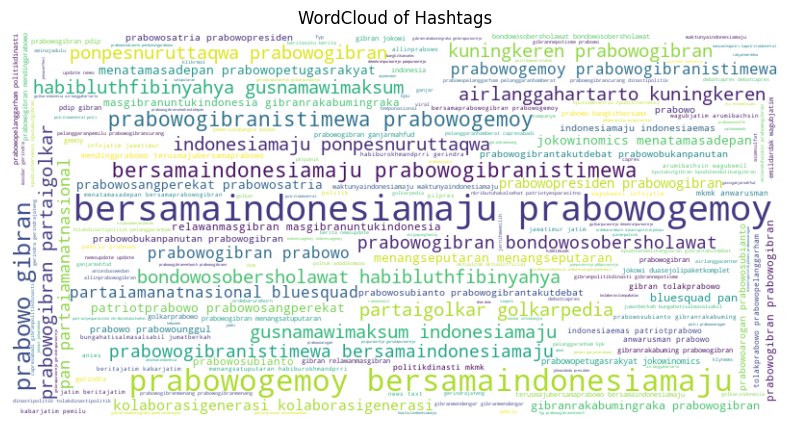

In [26]:
plt.figure(figsize=(10, 5))
plt.imshow(hashtags_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Hashtags')
plt.show()

In [27]:
# Calculating the hashtags frequency
word_counts = Counter(hashtags_cleaned)
most_common = word_counts.most_common(20)  # Unveiling the top 10 most frequently used hashtags

# Unveiling the most frequently used hashtags
print("Words that appear most frequently in the 'hashtags' feature:")
print(most_common)

# Calculating the least frequently used hashtags
least_common = word_counts.most_common()[:-21:-1]  # Unveiling the 10 least used hashtags

# Unveiling the least frequently used hashtags
print("Words that appear least frequently in the 'hashtags' feature:")
print(least_common)

Words that appear most frequently in the 'hashtags' feature:
[('prabowogibran', 804), ('prabowogemoy', 640), ('bersamaindonesiamaju', 599), ('prabowo', 385), ('prabowogibranistimewa', 257), ('gibran', 228), ('indonesiamaju', 184), ('bondowosobersholawat', 162), ('prabowosubianto', 123), ('partaigolkar', 113), ('airlanggahartarto', 110), ('golkarpedia', 107), ('ponpesnuruttaqwa', 106), ('habibluthfibinyahya', 105), ('gusnamawimaksum', 105), ('kuningkeren', 101), ('prabowopresiden', 90), ('kolaborasigenerasi', 86), ('pan', 81), ('partaiamanatnasional', 80)]
Words that appear least frequently in the 'hashtags' feature:
[('demokratbersamaprabowo', 1), ('rockygerung', 1), ('ganjarsikatkorupsi', 1), ('sipalingganjar', 1), ('kabarpilpres', 1), ('beritapilpres', 1), ('infopilpres', 1), ('aniescakimin', 1), ('penjahat', 1), ('boikot', 1), ('appsi', 1), ('ciputat', 1), ('pedagangpasar', 1), ('tiktokberita', 1), ('gemoybergelora', 1), ('taufanpawe', 1), ('golkarsulsel', 1), ('wisawayahe', 1), ('t

**Insights :**

Daftar hashtag yang paling sering digunakan menunjukkan topik atau tema yang banyak dibahas atau ditekankan dalam dataset ini. Misalnya:

1. **'prabowogibran', 'prabowogemoy', 'bersamaindonesiamaju', 'prabowo', 'prabowogibranistimewa', 'gibran', 'indonesiamaju** sangat sering muncul. Ini mengindikasikan keterkaitan yang signifikan antara beberapa hashtags berikut dengan kampanye politik atau gerakan yang melibatkan Prabowo-Gibran sebagai kandidat Calon Presiden dan Calon Wakil Presiden Republik Indonesia.
2. Hashtags lain seperti **'bondowosobersholawat', 'habibluthfibinyahya', 'gusnamawimaksum'** mengindikasikan afiliasi keagamaan atau spiritual.
3. Selain itu, partai politik seperti **'partaigolkar', 'pan', 'partaiamanatnasional'** disebutkan, menunjukkan pembicaraan atau dukungan terhadap kelompok politik tertentu.

Sebaliknya, hashtag yang paling jarang muncul tampaknya lebih beragam dan spesifik. Mereka mungkin mencakup topik lokal, individu, atau acara yang belum mendapatkan perhatian atau diskusi luas dalam dataset ini. Beberapa hashtag yang kurang sering ini termasuk **'demokratbersamaprabowo', 'rockygerung', 'aniescakimin', 'boikot', 'appsi', 'pedagangpasar'**, yang mungkin terkait dengan acara, individu, atau tindakan tertentu yang belum mendapat perhatian yang luas dalam konteks kampanye pasangan Calon Presiden dan Calon Wakil Presiden ini.

> **Wordclouds of Texts**

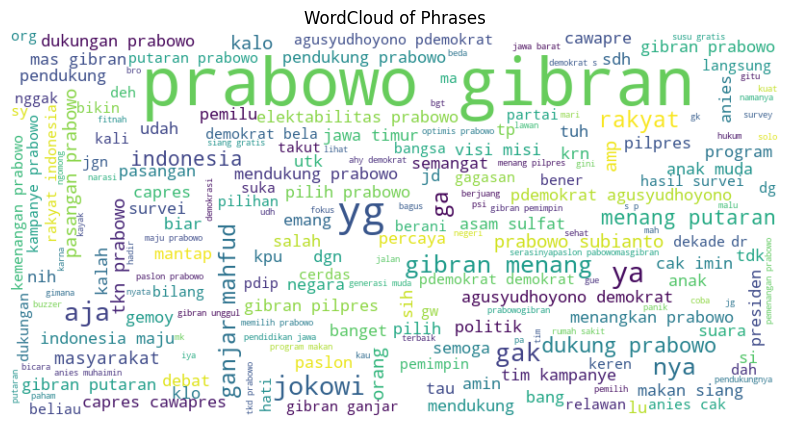

In [28]:
# Visualisasi WordCloud untuk frase
plt.figure(figsize=(10, 5))
plt.imshow(text_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Phrases')
plt.show()

In [29]:
# Calculating the phrase frequency
word_counts = Counter(data['text_processed'])
most_common = word_counts.most_common(20)  # Unveiling the top 10 most frequently used phrases

# Unveiling the most frequently used phrases
print("Phrases that appear most frequently in the tweets:")
print(most_common)

# Calculating the least frequently used phrases
least_common = word_counts.most_common()[:-21:-1]  # Unveiling the 10 least used phrases

# Unveiling the least frequently used hashtags
print("Words that appear least frequently in the tweets:")
print(least_common)

Phrases that appear most frequently in the tweets:
[('prabowo gibran menang putaran', 30), ('prabowo gibran indonesia maju', 18), ('prabowo gibran', 16), ('prabowo gibran putaran', 16), ('ditindak terlibat e ktp budakwanita december', 16), ('', 14), ('keren', 10), ('artikel lengkap', 10), ('organisasi perangkat desa dukung prabowo gibran uu', 9), ('sby instruksikan kader demokrat menangkan prabowo gibran wka agusyudhoyono pdemokrat demokrat bela rakyat', 9), ('sby instruksikan kader demokrat menangkan prabowo gibran ivy agusyudhoyono pdemokrat demokrat belas', 9), ('prabowo gibran menang', 8), ('pilih prabowo gibran', 8), ('ahy tegaskan demokrat kampanye bareng prabowo gibran ocf agusyudhoyono pdemokrat demokrat s p', 8), ('sby instruksikan kader demokrat menangkan prabowo gibran qu agusyudhoyono pdemokrat demokrat s p', 8), ('all in prabowo gibran', 7), ('prabowo gibran pasangan kandidat buruk sejarah indonesia modern', 7), ('prabowo gibran bangun kota inovasi idn times', 7), ('parah 

**Insights :**

Daftar frasa yang paling sering muncul dalam tweet menunjukkan topik atau pesan yang paling banyak dibahas atau diulang dalam dataset ini. Beberapa contohnya:

1. **'prabowo gibran menang putaran', 'prabowo gibran indonesia maju'** sering muncul, mengindikasikan pembahasan seputar dukungan untuk kemenangan atau perkembangan terkait pasangan Prabowo-Gibran sebagai Calon Presiden dan Calon Wakil Presiden Republik Indonesia.
2. **'prabowo gibran', 'prabowo gibran putaran'** muncul cukup sering, menunjukkan fokus perbincangan pengguna twitter pada pasangan calon tersebut.
3. Terdapat juga frasa **'ditindak terlibat e ktp budakwanita december'** yang muncul dengan frekuensi tinggi, mungkin terkait dengan sebuah kejadian atau topik yang menjadi sorotan dalam periode waktu tertentu.

Di sisi lain, frasa yang paling jarang muncul tampaknya lebih bervariasi dan spesifik. Mereka mungkin mencakup opini atau konteks yang kurang populer atau belum banyak dibahas dalam dataset ini. Beberapa di antaranya adalah **'prabowo gibran pemimpin idaman masyarakat indonesia', 'februari prabowo gibran', 'terbaik nih pasangan prabowo gibran love love'**, yang mungkin mencerminkan pandangan individu atau pesan yang belum mendapat perhatian yang luas dalam diskusi umum.

Hal ini menunjukkan bahwa dalam percakapan atau tweets yang diamati, terdapat sejumlah tema atau pesan yang sering disorot dan ditekankan oleh pengguna, sementara beberapa topik atau pandangan lainnya mungkin kurang diperbincangkan atau mendapat perhatian yang lebih sedikit.

**4.3 Topic Exposure Analysis**

*In this section, we will perform a further analysis regarding the topic/tweets exposure in twitter platform regarding Prabowo-Gibran as the presidential and vice-presidential candidates in the 2024 Indonesian election.*

**4.3.1 Exposure per Date**

In [30]:
# Re-ensuring the 'created_at' feature is in the format of datetime data type
data['created_at'] = pd.to_datetime(data['created_at'])

# Calculating tweets per day
tweet_per_date = data.groupby(data['created_at'].dt.date)['full_text'].count()

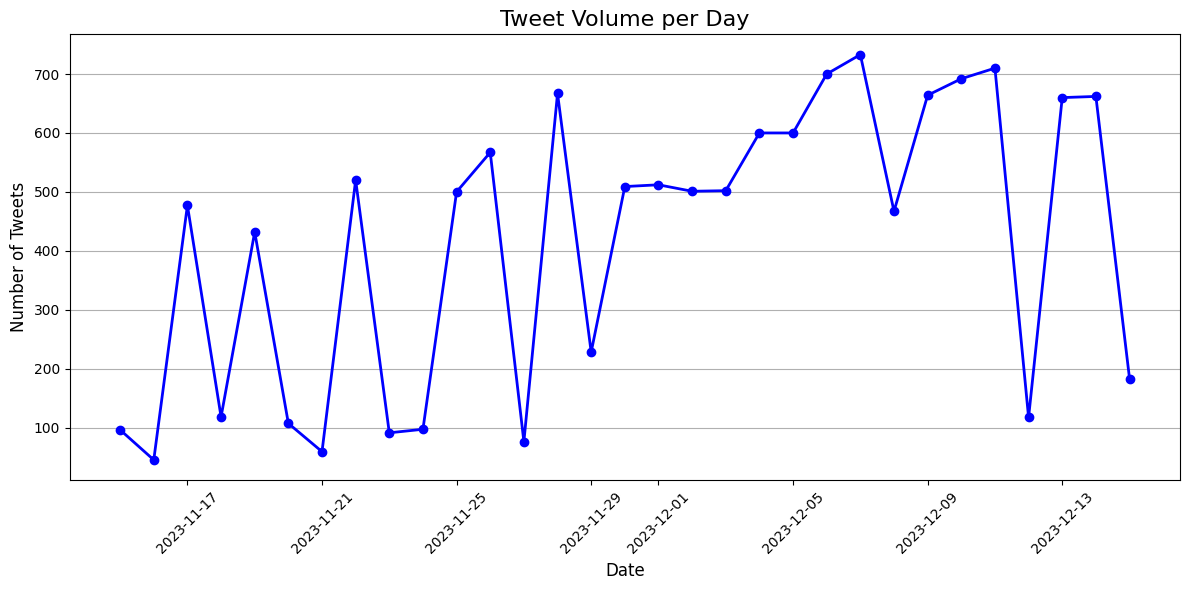

In [31]:
plt.figure(figsize=(12, 6))

# Plotting the tweet volume per day
tweet_per_date.plot(kind='line', marker='o', linestyle='-', color='blue', linewidth=2, markersize=6)

plt.title('Tweet Volume per Day', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Insights :**

Dari data yang diberikan, terdapat jumlah tweet per hari dalam rentang tanggal tertentu. Berikut beberapa insight yang dapat diperoleh dari data tersebut:

1. **Tren Jumlah Tweet**: Terlihat fluktuasi jumlah tweet harian yang cukup signifikan dari tanggal 15 November 2023 hingga 15 Desember 2023. Ada variasi jumlah tweet yang signifikan antara hari-hari tertentu.

2. **Peningkatan Aktivitas**: Terdapat peningkatan yang cukup besar dalam aktivitas tweet pada beberapa hari, seperti pada tanggal 28 November, 6 Desember, 7 Desember, dan 10-12 Desember. Hal ini mungkin menunjukkan adanya peristiwa atau topik yang menarik perhatian pada hari-hari tersebut, sehingga pengguna media sosial aktif dalam berdiskusi atau berbagi informasi.

3. **Pengurangan Aktivitas**: Pada beberapa hari tertentu, terutama di awal periode (15-23 November), jumlah tweet cenderung lebih rendah. Ini bisa disebabkan oleh kurangnya peristiwa atau topik menarik yang membuat pengguna kurang aktif di platform media sosial.

4. **Tren Jangka Panjang**: Secara keseluruhan, terdapat tren peningkatan jumlah tweets seiring berjalannya waktu, terutama menuju pertengahan dan akhir periode pengamatan (dari akhir November hingga pertengahan Desember). Namun, terdapat penurunan drastis terkait jumlah tweets pada tanggal 15 Desember 2023 yang bisa disebabkan juga oleh berkurangnya peristiwa atau topik menarik yang membuat para pengguna kurang aktif di platform media sosial twitter di hari tersebut.

Data ini memberikan gambaran umum tentang pola aktivitas tweet dari waktu ke waktu, yang dapat membantu dalam memahami tren partisipasi dan minat pengguna pada topik atau peristiwa tertentu selama rentang waktu yang diberikan.

**4.3.2 Exposure per Day**

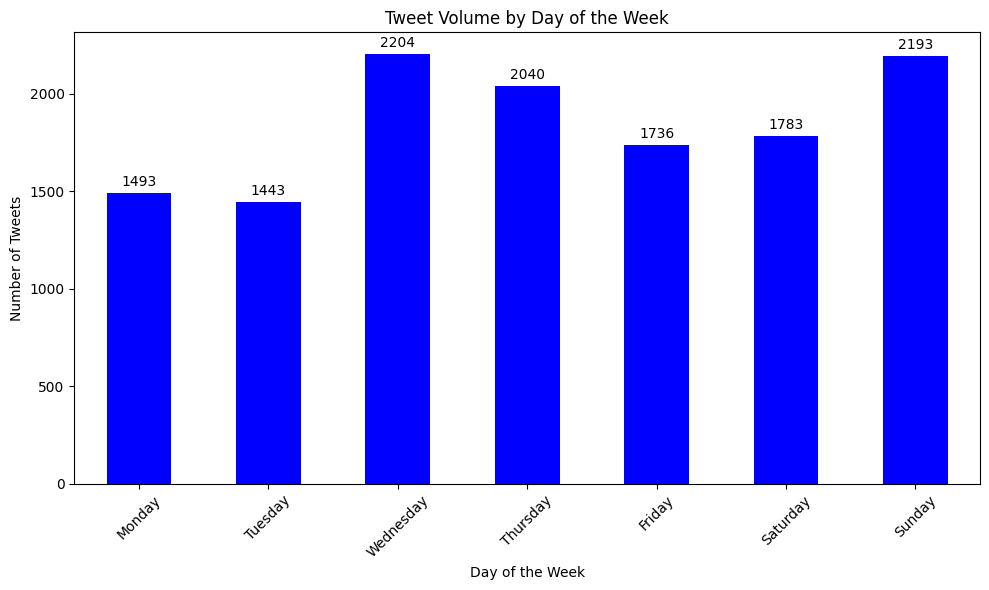

In [32]:
# Map the datetime index to the day of the week (0: Monday, 6: Sunday)
data['day_of_week'] = data['created_at'].dt.dayofweek

# Define the names of the days
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group tweets by day of the week and count the number of tweets for each day
tweet_per_day = data.groupby('day_of_week')['full_text'].count().reindex(range(7), fill_value=0)

# Reindex the series with the names of the days
tweet_per_day.index = days

plt.figure(figsize=(10, 6))

# Plotting the tweet volume per day as a bar plot
bars = tweet_per_day.plot(kind='bar', color='Blue')

plt.title('Tweet Volume by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)

# Adding labels for each bar
for i, value in enumerate(tweet_per_day.values):
    plt.text(i, value + 20, str(value), ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()

**Insights :**

Dari data jumlah tweet berdasarkan hari dalam seminggu, berikut adalah beberapa insights yang dapat diambil:

1. **Aktivitas Tertinggi di Pertengahan Minggu dan Hari Minggu**: Jumlah tweet tertinggi terlihat pada hari Rabu dan Minggu, yaitu pada pertengahan dan akhir minggu. 

2. **Aktivitas Rendah di Awal Minggu**: Jumlah tweet cenderung lebih rendah pada hari Senin dan Selasa, menunjukkan bahwa pengguna cenderung kurang aktif di awal pekan.

3. **Stabilitas Pada Pertengahan Hari Kerja (Rabu, Kamis)**: Ada kestabilan dalam jumlah tweet pada hari Rabu dan Kamis, yang mungkin menunjukkan bahwa pengguna cenderung lebih aktif di platform media sosial pada rentang pertengahan minggu.

4. **Peningkatan Aktivitas Menuju Akhir Pekan**: Jumlah tweet juga cenderung meningkat di hari Jumat, Sabtu, dan khususnya pada hari Minggu, yang menandakan peningkatan aktivitas jelang akhir pekan.

**4.3.3 Audience Engagement Per Date**

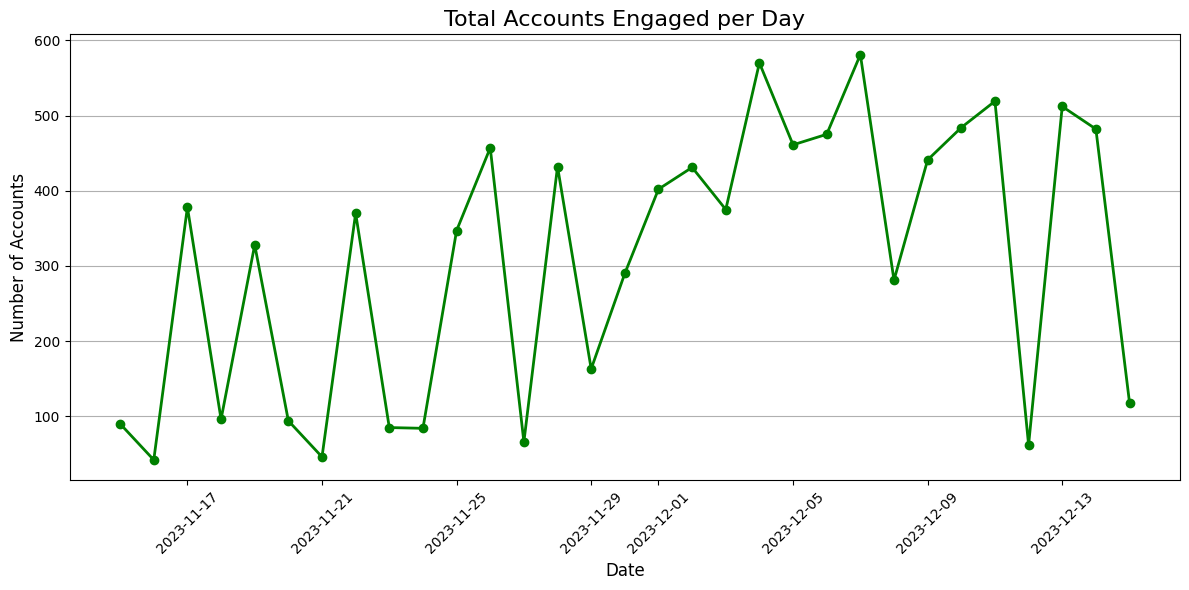

created_at
2023-11-15     90
2023-11-16     42
2023-11-17    378
2023-11-18     96
2023-11-19    328
2023-11-20     94
2023-11-21     46
2023-11-22    370
2023-11-23     85
2023-11-24     84
2023-11-25    347
2023-11-26    457
2023-11-27     66
2023-11-28    432
2023-11-29    163
2023-11-30    290
2023-12-01    402
2023-12-02    431
2023-12-03    375
2023-12-04    570
2023-12-05    461
2023-12-06    475
2023-12-07    581
2023-12-08    281
2023-12-09    441
2023-12-10    484
2023-12-11    519
2023-12-12     62
2023-12-13    512
2023-12-14    482
2023-12-15    118
Name: username, dtype: int64

In [33]:
# Re-ensuring the 'created_at' feature is in the format of datetime data type
data['created_at'] = pd.to_datetime(data['created_at'])
# Grouping by 'created_at' and counting unique usernames to get the total accounts engaged each day
accounts_per_date = data.groupby(data['created_at'].dt.date)['username'].nunique()

plt.figure(figsize=(12, 6))

# Plotting the total accounts engaged per day
accounts_per_date.plot(kind='line', marker='o', linestyle='-', color='green', linewidth=2, markersize=6)

plt.title('Total Accounts Engaged per Day', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Accounts', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

accounts_per_date

**Insights :**

Data di atas menunjukkan jumlah akun yang terlibat dalam topik pada setiap tanggal yang terdaftar. Berikut adalah beberapa insight yang bisa diperoleh dari data tersebut:

1. **Fluktuasi Aktivitas Harian:** Terlihat fluktuasi yang signifikan dalam jumlah akun yang terlibat dalam topik pada berbagai tanggal. Ada beberapa hari dengan lonjakan signifikan dalam partisipasi, sementara pada beberapa hari lainnya terdapat jumlah partisipasi yang lebih rendah.

2. **Peningkatan dan Penurunan Aktivitas:** Ada periode tertentu di mana terjadi peningkatan tajam dalam partisipasi, yang kemudian diikuti oleh penurunan pada hari-hari berikutnya. Hal ini menunjukkan adanya tren fluktuasi partisipasi pengguna dalam diskusi topik tersebut.

3. **Puncak Aktivitas:** Beberapa tanggal tertentu menonjol dengan jumlah akun terlibat yang tinggi, sementara tanggal lainnya memiliki partisipasi yang lebih rendah. Puncak aktivitas pada tanggal-tanggal tertentu bisa menjadi titik fokus untuk menganalisis dan memahami apa yang menyebabkan peningkatan tersebut.

4. **Tren Aktivitas Secara Keseluruhan:** Secara keseluruhan, terdapat variasi dalam jumlah akun yang terlibat dari waktu ke waktu. Ini bisa menunjukkan minat atau keterlibatan yang bervariasi dari pengguna dalam topik tersebut.

Analisis lebih lanjut mungkin diperlukan untuk memahami faktor apa yang menyebabkan fluktuasi dan tren partisipasi ini, serta bagaimana hal tersebut berkaitan dengan topik yang sedang dibahas.

**4.4 Tweets Sentiment Analysis**

*In this section, we will observe the sentiments initiated by the discussions of topics related to Prabowo-Gibran as the presidential and vice-presidential candidates in the 2024 Indonesian election.*

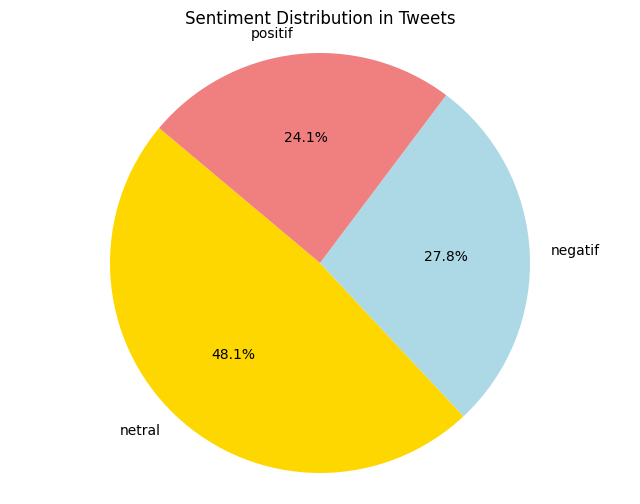

sentiment_label
netral     6199
negatif    3580
positif    3113
Name: count, dtype: int64

In [34]:
# Calculating the sentiments
sentiment_counts = data['sentiment_label'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
colors = ['gold', 'lightblue', 'lightcoral']

# Creating the pie chart
plt.pie(sentiment_counts, labels=sentiment_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution in Tweets')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

sentiment_counts

**Insights :**

1. **Sentimen Dominan**: Sentimen 'Netral' tampaknya menjadi yang paling sering muncul di antara sentimen yang terwakili dalam dataset, dengan 48.1% kemunculan. Hal ini menunjukkan bahwa sebagian besar tweets tetap netral dalam sentimennya.

2. **Sentimen Negatif**: Meskipun sentimen 'Netral' paling sering muncul, sentimen 'Negatif' mengikuti dengan 27.8% kemunculan. Ini mengindikasikan adanya sentimen negatif yang signifikan dalam dataset, mungkin menggarisbawahi masalah khusus, keprihatinan, atau kritik.

3. **Sentimen Positif**: Sentimen 'Positif' tampaknya paling jarang muncul di antara ketiga sentimen tersebut, dengan 24.1% kemunculan. Namun demikian, ini tetap mewakili bagian yang cukup besar dari dataset, menunjukkan adanya pandangan atau ekspresi positif dalam dataset.

4. **Tema Umum**: Dataset ini terlihat mencakup beragam sentimen, termasuk netral, negatif, dan positif, mencerminkan beragam pendapat, sikap, atau emosi yang terkait dengan konten yang dianalisis.

5. **Keseimbangan vs. Kecenderungan Sentimen**: Keberadaan jumlah yang lebih besar dari sentimen 'Netral' mungkin menunjukkan perspektif yang lebih seimbang atau objektif dalam dataset, sementara kemunculan sentimen 'Negatif' mungkin menunjukkan adanya aspek yang kontroversial atau kritis dalam dataset. Sentimen 'Positif', meskipun jumlahnya lebih sedikit, masih memberikan kontribusi yang cukup besar dari ekspresi positif.

Memahami distribusi sentimen ini membantu dalam menilai landscape sentimen umum dalam dataset, memberikan wawasan awal tentang sifat sentimen yang diekspresikan dalam topic yang dianalisis.

<Figure size 1000x600 with 0 Axes>

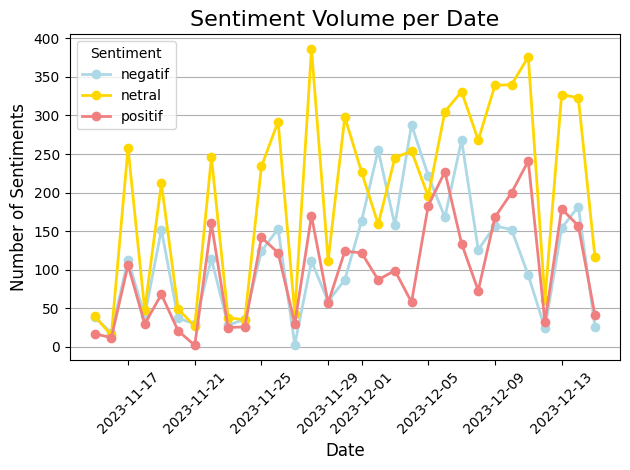

In [35]:
# Re-ensuring the data types of the dates
data = pd.DataFrame(data)
data['created_at'] = pd.to_datetime(data['created_at']).dt.date

# Group tweets by date and sentiment, then count the number of tweets for each sentiment per date
sentiments_per_date = data.groupby(['created_at', 'sentiment_label']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))

# Adjust the colors of each sentiments
colors = ['lightblue', 'gold', 'lightcoral']

# Plot the line chart as visualization of the data
sentiments_per_date.plot(kind='line', marker='o', linestyle='-', linewidth=2, markersize=6, color=colors)

plt.title('Sentiment Volume per Date', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Sentiments', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


In [36]:
sentiments_per_date

sentiment_label,negatif,netral,positif
created_at,,,
2023-11-15,39,40,17
2023-11-16,18,15,12
2023-11-17,113,258,106
2023-11-18,40,48,30
2023-11-19,152,212,68
2023-11-20,37,49,21
2023-11-21,30,27,2
2023-11-22,114,246,160
2023-11-23,28,38,25


**Insight :**

Berikut adalah beberapa insight yang dapat diperoleh dari data tersebut:

1. **Fluktuasi Sentimen**: Terdapat fluktuasi jumlah sentimen yang dicatat per hari. Misalnya, terdapat variasi jumlah sentimen negatif, netral, dan positif di setiap hari dari tanggal 15 November 2023 hingga 15 Desember 2023.
  
2. **Perubahan Pola Sentimen**: Tampaknya ada perubahan pola sentimen pada tanggal 2 Desember dan 3 Desember 2023. Pada tanggal 2023-12-02 (2 Desember 2023), terjadi peningkatan yang signifikan dalam jumlah sentimen negatif (255) dibandingkan dengan jumlah sentimen netral (159) dan positif (87). Perubahan ini dapat disebabkan oleh adanya peristiwa atau topik yang relevan pada tanggal tersebut yang mengakibatkan perubahan pola sentimen pada tanggal 2 Desember dan 3 Desember, yang kemudian terjadi perubahan kembali pada 5 Desember dimana sentimen netral dan positif kembali mengungguli sentimen negatif.

3. **Dominasi Sentimen Netral** : Dari data di atas, dapat disimpulkan bahwa selama rentang waktu observasi dari tanggal 15 November 2023 hingga 15 Desember 2023, terlihat dominasi dari sentimen netral pada percakapan atau topik yang diungkapkan dalam tweet yang berkaitan dengan Prabowo-Gibran sebagai Calon Presiden dan Calon Wakil Presiden.

**4.5 Twitter Account Analysis**

*In this section, we will observe the twitter accounts engaged to the topics related to Prabowo-Gibran as the presidential and vice-presidential candidates in the 2024 Indonesian election in twitter platform.*

In [37]:
data

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,VerifiedStatus,FollowersCount,sentiment_label,sentiment_score,hashtag,text_processed,day_of_week
0,2023-11-15,1724940299250827575,@xquitavee @prabowo @gibran_tweet @psi_id @jok...,0,0,0,0,in,1420228891994517507,1724591423444713876,AmirMah36541437,https://twitter.com/AmirMah36541437/status/172...,Not Verified,Follower Count Not Found,netral,0,[],gua nomor salam perubahan,2
1,2023-11-15,1724940167767785893,@yehovarapha_ Boleh gak mutualan sama pendukun...,0,0,0,0,in,781527721,1724770699737444761,numadayana,https://twitter.com/numadayana/status/17249401...,Not Verified,10.5K,negatif,-1,[],gak mutualan pendukung prabowo gibran,2
2,2023-11-15,1724940091058163837,Nurul Arifin Apresiasi Keputusan KPU Atas Pene...,0,0,49,11,in,721898354502930433,1724940091058163837,golkarpedia,https://twitter.com/golkarpedia/status/1724940...,Not Verified,"2,306",netral,0,"['#airlanggahartarto', '#kuningkeren', '#Prabo...",nurul arifin apresiasi keputusan kpu penetapan...,2
3,2023-11-15,1724939961080991996,@uludagerdi @hariqosatria @prabowo @gibran_twe...,0,0,0,0,in,891872532,1723518365321568366,hagj12,https://twitter.com/hagj12/status/172493996108...,Not Verified,Follower Count Not Found,netral,0,[],no menang,2
4,2023-11-15,1724939341246697524,Saatnya Rakyat memilih untuk Indonesia....Prog...,0,2,9,22,in,1227499861580251136,1724939341246697524,Lembayung071,https://twitter.com/Lembayung071/status/172493...,Not Verified,12.2K,positif,1,['#PrabowoGibran2024'],rakyat memilih indonesia program prioritas pra...,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12887,2023-12-15,1735764587679715584,@psi_id 14 Februari 2024 Prabowo Gibran ✌️,0,0,0,0,in,945481436,1735673656259289587,axelbaronn,https://twitter.com/axelbaronn/status/17357645...,Not Verified,Follower Count Not Found,netral,0,[],februari prabowo gibran,4
12888,2023-12-15,1735764448273670198,"Inilah satu contoh NEGARA KEKUASAAN"" yg diseb...",0,0,0,0,in,1641722122874814464,1735764448273670198,Indra1444H,https://twitter.com/Indra1444H/status/17357644...,Not Verified,26,netral,0,[],contoh negara kekuasaan yg aturan hukum kendal...,4
12889,2023-12-15,1735764204051931312,@Beritasatu Prabowo Gibran pemimpin paling tep...,0,0,0,0,in,1598486990994874368,1735537443305402560,Rezaind8,https://twitter.com/Rezaind8/status/1735764204...,Not Verified,Follower Count Not Found,positif,1,[],prabowo gibran pemimpin kesejahteraan masyarakat,4
12890,2023-12-15,1735763927739572503,@Beritasatu Inilah Prabowo Gibran pemimpin ida...,0,0,0,0,in,1598502855467376642,1735537443305402560,AngestiNina,https://twitter.com/AngestiNina/status/1735763...,Not Verified,Follower Count Not Found,positif,1,[],prabowo gibran pemimpin idaman masyarakat indo...,4


**4.5.1 Accounts with Most Tweets**

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12892 entries, 0 to 12891
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   created_at           12892 non-null  object
 1   id_str               12892 non-null  object
 2   full_text            12892 non-null  object
 3   quote_count          12892 non-null  int64 
 4   reply_count          12892 non-null  int64 
 5   retweet_count        12892 non-null  int64 
 6   favorite_count       12892 non-null  int64 
 7   lang                 12892 non-null  object
 8   user_id_str          12892 non-null  object
 9   conversation_id_str  12892 non-null  object
 10  username             12892 non-null  object
 11  tweet_url            12892 non-null  object
 12  VerifiedStatus       12892 non-null  object
 13  FollowersCount       12892 non-null  object
 14  sentiment_label      12892 non-null  object
 15  sentiment_score      12892 non-null  int64 
 16  hash

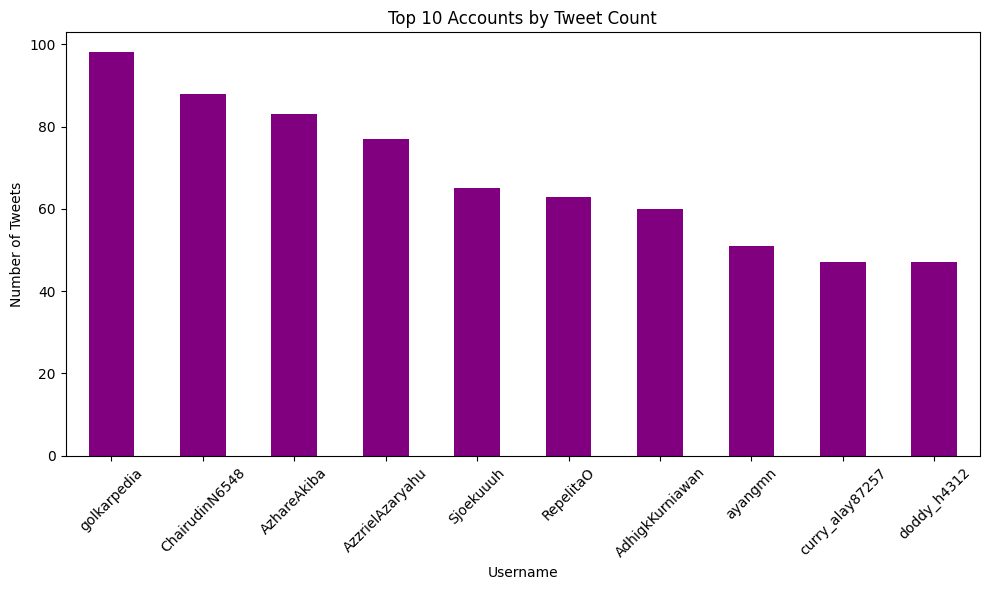

username
golkarpedia        98
ChairudinN6548     88
AzhareAkiba        83
AzzrielAzaryahu    77
Sjoekuuuh          65
                   ..
DesriyantoHeri      1
boodmynded24        1
soblah208           1
HandrianiMirza      1
Indra1444H          1
Name: count, Length: 6866, dtype: int64

In [39]:
# Calculating the amount of tweets in each account involved in this dataset
tweet_count_per_account = data['username'].value_counts()

# Unveiling 10 Accounts with most tweets
top_10_accounts = tweet_count_per_account.head(10)

# Plotting the barplot
plt.figure(figsize=(10, 6))
top_10_accounts.plot(kind='bar', color='Purple')
plt.title('Top 10 Accounts by Tweet Count')
plt.xlabel('Username')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

tweet_count_per_account

**Insight :**

Data di atas menunjukkan jumlah tweets per akun pengguna Twitter yang terlibat dalam diskusi atau tweets yang berkaitan dengan pasangan calon Prabowo-Gibran. Berikut adalah beberapa insight yang bisa diambil dari data ini:

1. **Aktivitas Terfokus pada Sejumlah Akun:** Mayoritas partisipasi dalam diskusi terkonsentrasi pada sejumlah akun yang lebih sedikit. Contohnya, ada beberapa akun yang berkontribusi dengan jumlah tweets yang signifikan seperti golkarpedia (98 tweets), ChairudinN6548 (88 tweets), AzhareAkiba (83 tweets), AzzrielAzaryahu (77 tweets), dan Sjoekuuuh (65 tweets).

2. **Konsistensi dan Keterlibatan Tinggi:** Akun-akun yang mempunyai jumlah tweets tinggi menunjukkan keterlibatan yang konsisten dalam diskusi tersebut. Hal ini bisa menandakan tingginya minat atau keterlibatan dari akun-akun tersebut terhadap topik yang sedang dibahas.

3. **Peningkatan Keterlibatan Secara Proporsional:** Terdapat penurunan jumlah tweets secara proporsional saat beralih ke akun dengan jumlah tweets yang lebih rendah. Jika dilihat dari segi perbandingan, banyak akun yang hanya berkontribusi dengan jumlah tweets yang relatif kecil (mungkin hanya satu atau beberapa tweets).

4. **Keterlibatan Beragam Pengguna:** Data menunjukkan bahwa ada sejumlah besar pengguna Twitter (6.866 Twitter Accounts) yang terlibat dalam diskusi mengenai pasangan calon Prabowo-Gibran. Hal ini menunjukkan minat dan partisipasi yang cukup beragam dari berbagai akun pengguna.

5. **Peran Akun-Akun dengan Jumlah Tweets Rendah:** Meskipun jumlah tweets dari beberapa akun mungkin kecil, peran mereka juga penting dalam memperkaya variasi opini dan pendapat dalam diskusi yang sedang berlangsung.

Secara lebih lanjut, untuk melihat seberapa berpengaruhnya twitter accounts dengan tweet terbanyak, kita dapat mengamatinya melalui perhitungan rata-rata engagement per tweetsnya

**4.5.2 Accounts with Most Followers**

In [40]:
# Identifying the unique values in FollowersCount
unique_followers_count = data['FollowersCount'].nunique()
print("Number of unique follower counts:", unique_followers_count)

Number of unique follower counts: 1417


In [41]:
# Unveiling unique values in FollowersCount 
unique_followers_count = data['FollowersCount'].unique()
unique_followers_count

array(['Follower Count Not Found', '10.5K', '2,306', ..., '989.1K',
       '1,192', '5,473'], dtype=object)

The occurrence of "followers count not found" might result from issues during the scraping process, possibly due to difficulties in locating the account username. This occurrence could imply instances where the account has changed its username.

Consequently, instances where the follower count is not found will be handled as missing values (NaN). Moreover, follower counts indicated with 'K' and 'M' symbols, representing thousands and millions in object form respectively, need to be converted into integer or float format for subsequent analysis.

In [42]:
# Replace 'Follower Count Not Found' with NaN
data['FollowersCount'] = data['FollowersCount'].replace('Follower Count Not Found', np.nan)

In [43]:
# Initiating a function to convert some followers count values
def convert_followers_count(FollowersCount):
    if isinstance(FollowersCount, float):
        return FollowersCount
    elif 'K' in FollowersCount: # Converting K in followers count into thousands in integer form
        return int(float(FollowersCount.replace('K', '').replace(',', '')) * 1000)
    elif 'M' in FollowersCount: # Converting M in followers count into millions in integer form
        return int(float(FollowersCount.replace('M', '').replace(',', '')) * 1000000)
    else:
        return int(FollowersCount.replace(',', '')) # Deleting the comma (,) in followers count

data['FollowersCount'] = data['FollowersCount'].map(convert_followers_count)

In [44]:
# Calculating the amount of followers in each account involved in this dataset
top_10_followers = data.groupby('username')['FollowersCount'].max().nlargest(10)

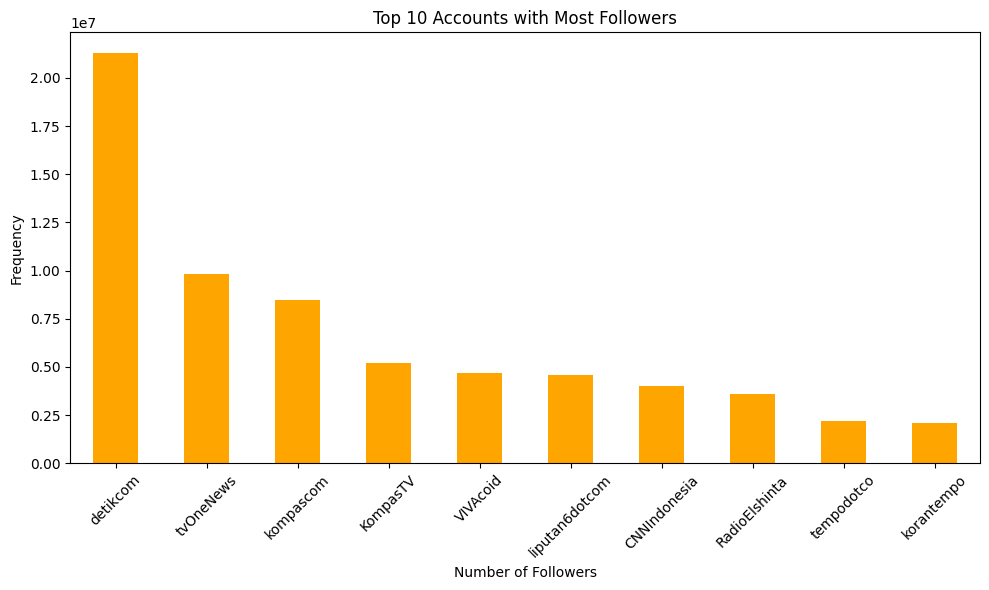

username
detikcom          21300000.0
tvOneNews          9800000.0
kompascom          8500000.0
KompasTV           5200000.0
VIVAcoid           4700000.0
liputan6dotcom     4600000.0
CNNIndonesia       4000000.0
RadioElshinta      3600000.0
tempodotco         2200000.0
korantempo         2100000.0
Name: FollowersCount, dtype: float64

In [45]:
# Plotting the barplot
plt.figure(figsize=(10, 6))
top_10_followers.plot(kind='bar', color='Orange')
plt.title('Top 10 Accounts with Most Followers')
plt.xlabel('Number of Followers')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top_10_followers

**Insights :**

Dari data most followers count usernames di atas, terlihat bahwa detikcom memiliki jumlah followers terbanyak, yaitu sekitar 21.3 juta pengikut, diikuti oleh tvOneNews dengan sekitar 9.8 juta pengikut, dan kemudian kompascom dengan sekitar 8.5 juta pengikut. Dengan jumlah followers yang tinggi, username-username tersebut memiliki potensi besar untuk mencapai audiens yang luas dalam penyebaran informasi atau pesan-pesan tertentu.

Hal ini menunjukkan bahwa akun-akun tersebut memiliki pengaruh besar dalam platform media sosial, sehingga pesan atau informasi yang mereka sampaikan memiliki peluang besar untuk tersebar luas dan menjadi sorotan publik. Jumlah followers yang signifikan juga dapat menjadi indikasi kredibilitas dan pengaruh dari media atau platform tersebut dalam membentuk opini publik.

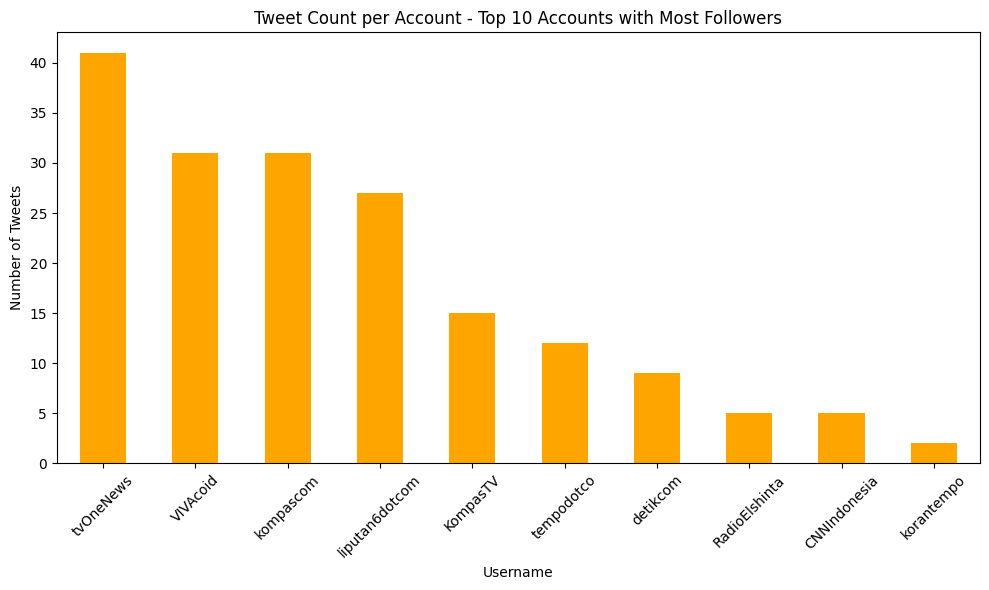

username
tvOneNews         41
VIVAcoid          31
kompascom         31
liputan6dotcom    27
KompasTV          15
tempodotco        12
detikcom           9
RadioElshinta      5
CNNIndonesia       5
korantempo         2
Name: count, dtype: int64

In [46]:
# Filtering the data to 10 accounts with most followers
top_10_followers_accounts = top_10_followers.index

# Calculating the total tweets of each accounts
tweet_count_top_10_followers = data[data['username'].isin(top_10_followers_accounts)]['username'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
tweet_count_top_10_followers.plot(kind='bar', color='Orange')
plt.title('Tweet Count per Account - Top 10 Accounts with Most Followers')
plt.xlabel('Username')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

tweet_count_top_10_followers

**Insights :**

1. **Dominasi Aktivitas di Platform:** Akun TVOneNews memimpin dengan jumlah tweet yang jauh lebih tinggi dibandingkan dengan akun lainnya. Ini menunjukkan tingginya aktivitas atau keterlibatan akun TVOneNews dalam platform Twitter dalam konteks topik atau peristiwa yang berkaitan dengan "Prabowo-Gibran".

2. **Partisipasi yang Signifikan:** VIVAcoid, kompascom, dan liputan6dotcom memiliki jumlah tweet yang cukup signifikan, meskipun belum sebanyak TVOneNews dan 10 twitter accounts dengan tweet terbanyak. Hal ini menunjukkan keterlibatan yang tinggi dari akun-akun tersebut dalam menyampaikan informasi atau konten terkait pencalonan Prabowo-Gibran sebagai Calon Presiden dan Calon Wakil Presiden Republik Indonesia kepada pengikutnya.

3. **Perbedaan Aktivitas:** Terdapat variasi dalam jumlah tweet antara KompasTV, tempodotco, dan detikcom. Meskipun tergolong dalam 10 akun dengan jumlah followers terbanyak, jumlah tweet mereka lebih rendah dibandingkan dengan akun lainnya dalam daftar ini. Ini bisa menunjukkan variasi strategi penggunaan Twitter atau fokus konten yang berbeda.

4. **Keterlibatan yang Lebih Rendah:** Akun RadioElshinta, CNNIndonesia, dan korantempo memiliki jumlah tweet yang lebih sedikit dibandingkan dengan akun-akun lainnya dalam daftar ini. Meskipun demikian, keberadaan mereka dalam daftar menunjukkan pentingnya posisi mereka sebagai akun dengan jumlah followers terbanyak, meskipun aktivitas tweetingnya relatif lebih rendah.

Dari data ini, terlihat bahwa aktivitas dan jumlah tweet tidak selalu sejalan dengan jumlah followers. Terkadang, meskipun memiliki banyak followers, beberapa akun cenderung memiliki aktivitas tweeting yang lebih rendah, sementara yang lain mungkin lebih aktif dalam berbagi konten atau informasi.

**4.5.3 The Engagement Comparisons of Most Tweets and Most Followed Twitter Accounts**

The average engagement of the account golkarpedia is: 55.57
The average engagement of the account ChairudinN6548 is: 9.93
The average engagement of the account AzhareAkiba is: 10.01
The average engagement of the account AzzrielAzaryahu is: 10.01
The average engagement of the account Sjoekuuuh is: 0.00
The average engagement of the account RepelitaO is: 0.44
The average engagement of the account AdhigkKurniawan is: 13.05
The average engagement of the account ayangmn is: 0.00
The average engagement of the account curry_alay87257 is: 0.00
The average engagement of the account doddy_h4312 is: 10.01


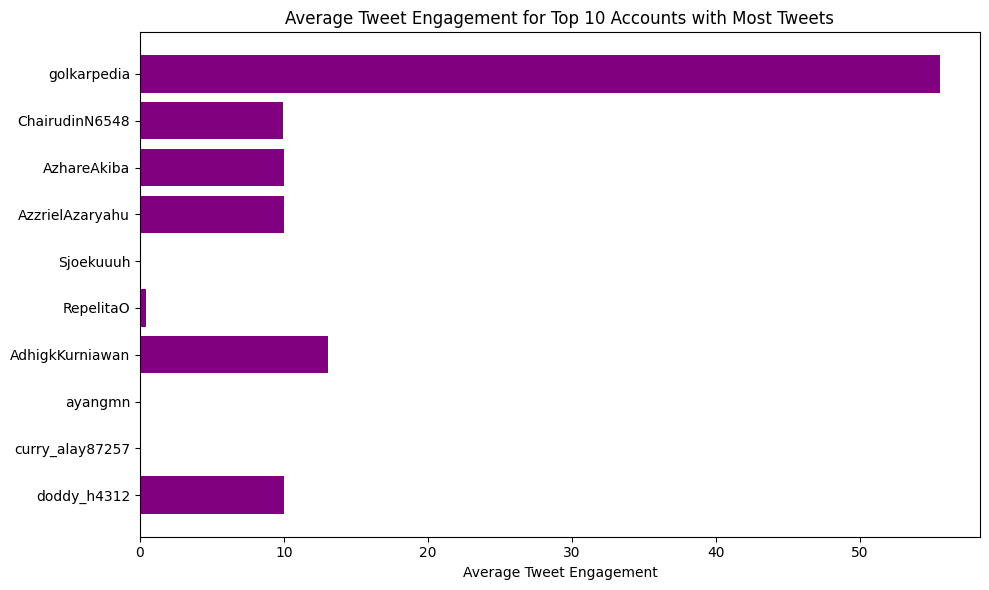

In [100]:
# Calculate tweet engagement for each account
data['tweet_engagement'] = data['retweet_count'] * 1.0 + data['favorite_count'] * 0.5 + data['reply_count'] * 13.5

# Calculate total tweets for each account
tweet_count_per_account = data['username'].value_counts()

# Combine tweet engagement and total tweets into a new DataFrame
account_summary = pd.DataFrame({'total_tweet': tweet_count_per_account, 'tweet_engagement': data.groupby('username')['tweet_engagement'].sum()})

# Sort the accounts based on total tweets and select the top 10
top_accounts = account_summary.sort_values('total_tweet', ascending=False).head(10)

# Calculate the average engagement for the top 10 accounts
average_engagement = top_accounts['tweet_engagement'] / top_accounts['total_tweet']

# Display the average engagement for the top 10 accounts
for username, avg_engagement in zip(top_accounts.index, average_engagement):
    print(f"The average engagement of the account {username} is: {avg_engagement:.2f}")
# Plotting the horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_accounts.index, average_engagement, color='Purple')
plt.xlabel('Average Tweet Engagement')
plt.title('Average Tweet Engagement for Top 10 Accounts with Most Tweets')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest tweet on top
plt.tight_layout()
plt.show()

username
detikcom           209.222222
tvOneNews         1075.146341
kompascom          303.612903
KompasTV           341.433333
VIVAcoid          1598.080645
liputan6dotcom     502.092593
CNNIndonesia       152.900000
RadioElshinta       14.500000
tempodotco         548.291667
korantempo        5374.250000
Name: avg_engagement_per_tweet, dtype: float64


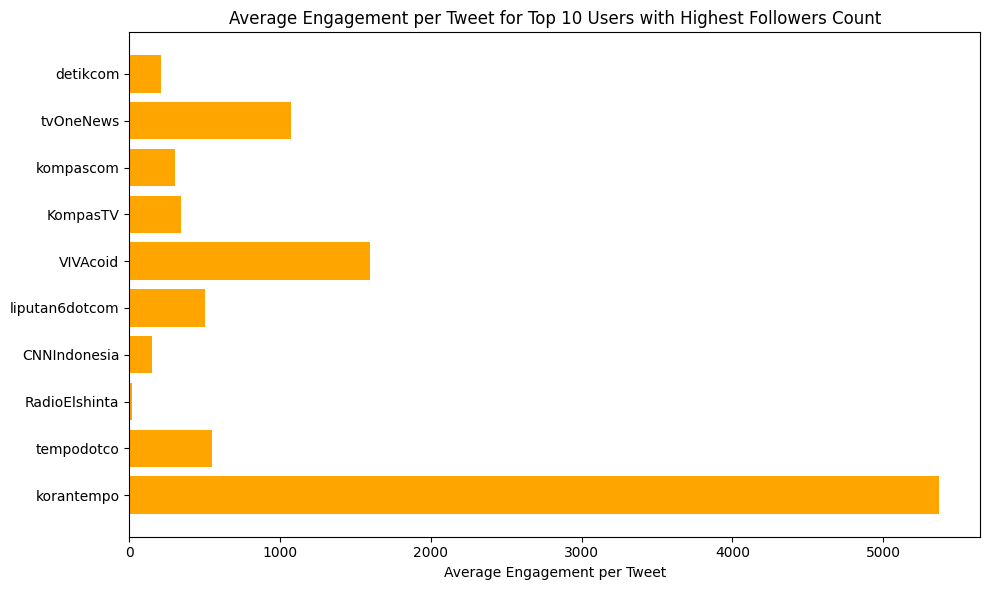

In [101]:
# Group data by username and calculate total engagements and total followers for each user
user_summary = data.groupby('username').agg({'tweet_engagement': 'sum', 'FollowersCount': 'max'})

# Sort users based on followers count and select the top 10
top_10_users = user_summary.sort_values('FollowersCount', ascending=False).head(10)

# Calculate average engagement per tweet for the top 10 users
top_10_users['avg_engagement_per_tweet'] = top_10_users['tweet_engagement'] / data[data['username'].isin(top_10_users.index)].groupby('username').size()

# Display the average engagement per tweet for the top 10 users
print(top_10_users['avg_engagement_per_tweet'])

# Plotting the horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_10_users.index, top_10_users['avg_engagement_per_tweet'], color='Orange')
plt.xlabel('Average Engagement per Tweet')
plt.title('Average Engagement per Tweet for Top 10 Users with Highest Followers Count')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Insight :**

1. **Jumlah Followers Memiliki Dampak yang Lebih Signifikan:** Twitter accounts dengan followers yang tinggi (Verified Accounts) terlihat cenderung untuk mendapatkan engagements yang lebih tinggi dibandingkan twitter accounts dengan tweet terbanyak. 

2. **Perbedaan Engagement di Antara Akun:** Adanya fluktuasi tingkat engagement di antara akun-akun yang masuk dalam kedua kategori menunjukkan bahwa engagement tidak selalu berkorelasi langsung dengan jumlah followers atau jumlah tweet yang dikirimkan. Ada faktor-faktor lain seperti kualitas konten, keterlibatan pengikut, atau strategi komunikasi yang mempengaruhi tingkat engagement.

3. **Pentingnya Konten yang Menarik:** Data ini menegaskan pentingnya konten yang menarik dan relevan bagi pengikut dalam meningkatkan tingkat engagement, terlepas dari seberapa sering akun tersebut mengirimkan tweet atau jumlah followers yang dimilikinya.

**4.5.4 Accounts With Most Positive Tweets**

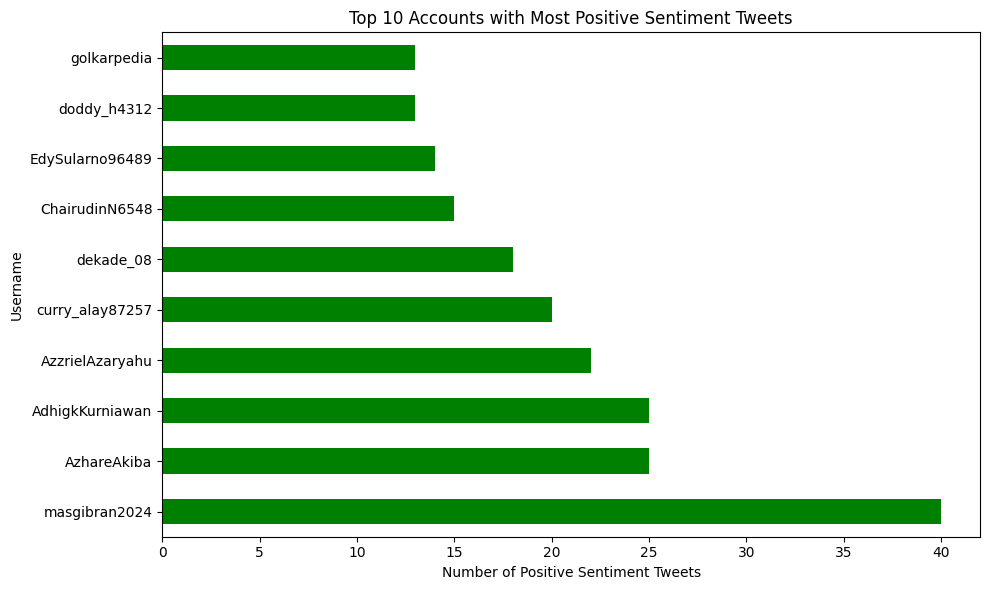

username
masgibran2024      40
AzhareAkiba        25
AdhigkKurniawan    25
AzzrielAzaryahu    22
curry_alay87257    20
dekade_08          18
ChairudinN6548     15
EdySularno96489    14
doddy_h4312        13
golkarpedia        13
Name: count, dtype: int64

In [49]:
# Filter the data for positive sentiment
positive_sentiment_data = data[data['sentiment_label'] == 'positif']

# Calculate the number of positive sentiment tweets per account
positive_sentiment_counts = positive_sentiment_data['username'].value_counts()

# Display the top accounts with the most positive sentiment tweets
top_accounts_positive_sentiment = positive_sentiment_counts.head(10)

plt.figure(figsize=(10, 6))

# Plotting the top accounts with positive sentiment tweets
top_accounts_positive_sentiment.plot(kind='barh', color='green')

plt.title('Top 10 Accounts with Most Positive Sentiment Tweets')
plt.xlabel('Number of Positive Sentiment Tweets')
plt.ylabel('Username')
plt.tight_layout()
plt.show()

top_accounts_positive_sentiment

**Insights :**

1. **Mas Gibran 2024 Mencatat Jumlah Tertinggi:** Akun "masgibran2024" memimpin dalam jumlah tweets bersentiment positif terbanyak dengan 40 tweets. Hal ini menunjukkan tingginya keterlibatan atau respons positif terhadap topik atau konten tertentu yang terkait dengan pasangan calon Prabowo-Gibran.

2. **Ragam Kontribusi Akun:** Terdapat variasi dalam kontribusi tweets positif dari beberapa akun. Ada beberapa akun seperti AzhareAkiba, AdhigkKurniawan, dan AzzrielAzaryahu yang juga aktif dalam menyebarkan sentimen positif berkaitan dengan topik yang sama.

3. **Diversifikasi Partisipasi:** Data menunjukkan adanya partisipasi yang cukup beragam dari sejumlah akun dalam menyebarkan sentimen positif. Hal ini menandakan adanya berbagai perspektif atau opini yang mendukung atau merespons dengan positif terhadap topik yang dibicarakan.

4. **Keterlibatan Akun Individu:** Ada kemungkinan bahwa akun-akun dengan jumlah tweets positif yang lebih rendah juga memainkan peran penting dalam menyebarkan sentimen positif terkait topik ini.

**4.5.5 Accounts with Most Netral Tweets**

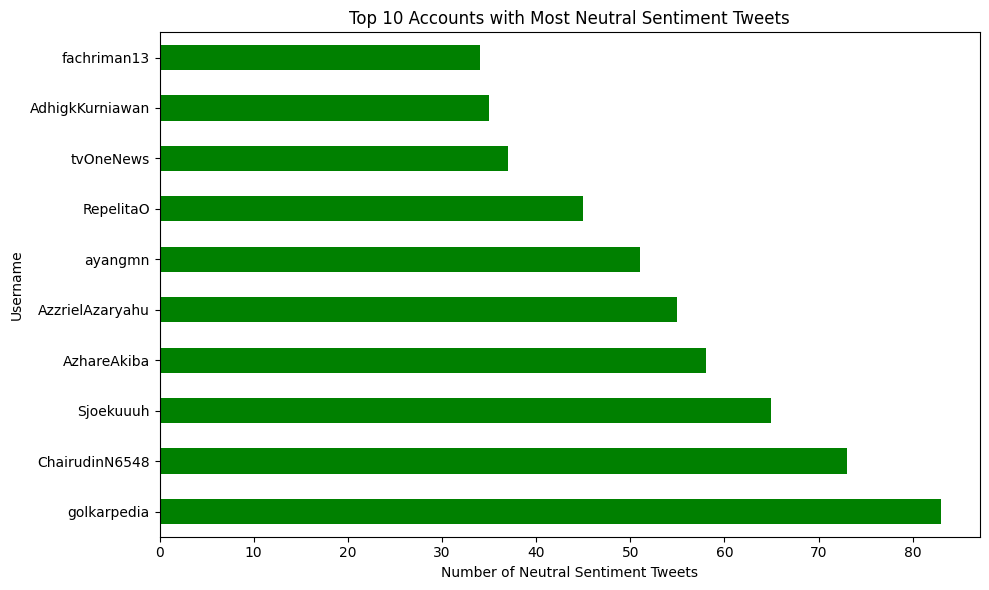

username
golkarpedia        83
ChairudinN6548     73
Sjoekuuuh          65
AzhareAkiba        58
AzzrielAzaryahu    55
ayangmn            51
RepelitaO          45
tvOneNews          37
AdhigkKurniawan    35
fachriman13        34
Name: count, dtype: int64

In [53]:
# Filter the data for positive sentiment
neutral_sentiment_data = data[data['sentiment_label'] == 'netral']

# Calculate the number of positive sentiment tweets per account
neutral_sentiment_counts = neutral_sentiment_data['username'].value_counts()

# Display the top accounts with the most positive sentiment tweets
top_accounts_neutral_sentiment = neutral_sentiment_counts.head(10)

plt.figure(figsize=(10, 6))

# Plotting the top accounts with neutral sentiment tweets
top_accounts_neutral_sentiment.plot(kind='barh', color='green')

plt.title('Top 10 Accounts with Most Neutral Sentiment Tweets')
plt.xlabel('Number of Neutral Sentiment Tweets')
plt.ylabel('Username')
plt.tight_layout()
plt.show()

top_accounts_neutral_sentiment

**Insights :**

1. **Golkarpedia & ChairudinN6548 Memiliki Kontribusi Tertinggi:** Akun "golkarpedia" dan "ChairudinN6548" mendominasi dengan jumlah tweets bersentimen netral yang tinggi, masing-masing dengan 83 dan 73 tweets. Kedua akun ini mungkin memiliki peran yang cukup signifikan dalam menyebarkan informasi netral terkait topik yang sedang dibahas.

2. **Ragam Kontribusi dari Akun Lainnya:** Selain dua akun teratas, ada beberapa akun lain seperti "Sjoekuuuh", "AzhareAkiba", dan "AzzrielAzaryahu" yang juga turut memberikan kontribusi dengan jumlah tweets bersentimen netral yang cukup signifikan.

3. **Akun dengan Kontribusi Sedang-Hingga-Rendah:** Terdapat sejumlah akun seperti "AdhigkKurniawan", "tvOneNews", dan "fachriman13" yang memberikan kontribusi dengan jumlah tweets netral yang lebih rendah dibandingkan dengan akun-akun utama lainnya.

4. **Pentingnya Sentimen Netral dalam Diskusi:** Sentimen netral juga memainkan peran penting dalam menyajikan informasi objektif atau netral mengenai topik tertentu. Hal ini menunjukkan adanya usaha untuk menyebarkan informasi tanpa adanya kecenderungan opini tertentu.

**4.5.6 Accounts with Most Negative Tweets**

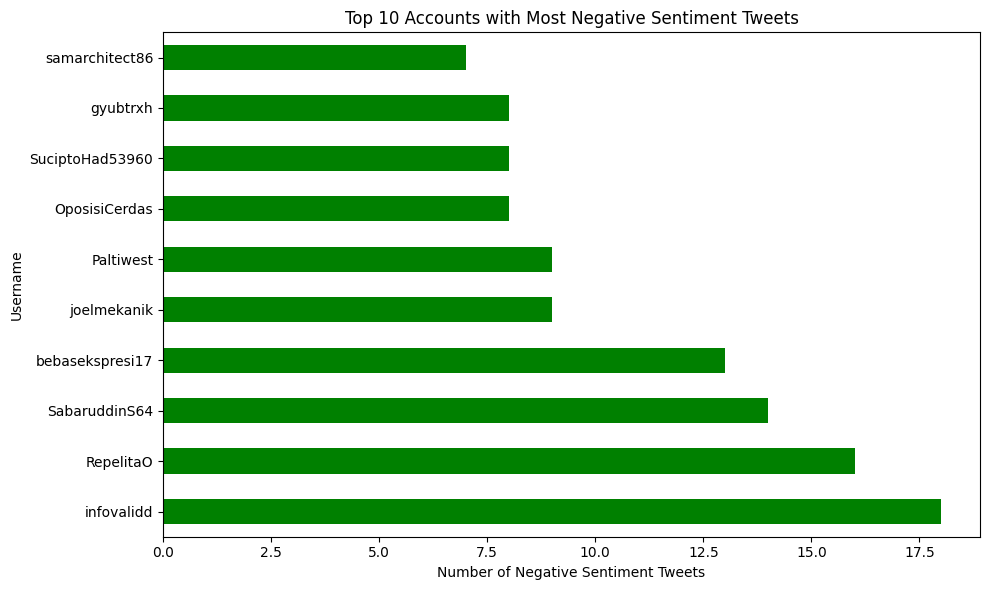

username
infovalidd         18
RepelitaO          16
SabaruddinS64      14
bebasekspresi17    13
joelmekanik         9
Paltiwest           9
OposisiCerdas       8
SuciptoHad53960     8
gyubtrxh            8
samarchitect86      7
Name: count, dtype: int64

In [52]:
# Filter the data for positive sentiment
negative_sentiment_data = data[data['sentiment_label'] == 'negatif']

# Calculate the number of positive sentiment tweets per account
negative_sentiment_counts = negative_sentiment_data['username'].value_counts()

# Display the top accounts with the most positive sentiment tweets
top_accounts_negative_sentiment = negative_sentiment_counts.head(10)

plt.figure(figsize=(10, 6))

# Plotting the top accounts with Negative sentiment tweets
top_accounts_negative_sentiment.plot(kind='barh', color='green')

plt.title('Top 10 Accounts with Most Negative Sentiment Tweets')
plt.xlabel('Number of Negative Sentiment Tweets')
plt.ylabel('Username')
plt.tight_layout()
plt.show()

top_accounts_negative_sentiment

**Insights :**

1. **Akun Infovalidd & RepelitaO Memiliki Tweets Bersentimen Negatif Terbanyak:** Akun "infovalidd" dan "RepelitaO" menjadi dua akun dengan jumlah tweets bersentimen negatif tertinggi, masing-masing dengan 18 dan 16 tweets. Kedua akun ini kemungkinan besar memberikan kontribusi yang signifikan terkait sentimen negatif terhadap topik yang dibahas.

2. **Konteks Sentimen Negatif dalam Diskusi:** Kontribusi sentimen negatif juga bisa memainkan peran dalam menyoroti berbagai pandangan atau masalah dalam diskusi yang sedang berlangsung.

# V. Challenges and Limitations of The Project

Beberapa tantangan dan batasan yang dihadapi dalam proyek ini meliputi:

1. Jumlah tweet yang cukup besar memerlukan proses pengambilan data yang memakan waktu dan memerlukan pengolahan data yang lebih kompleks.
2. Pembatasan pada API Twitter menyebabkan hasil pencarian tidak dapat ditampilkan dalam rentang waktu tertentu, mengharuskan proses pengambilan data terbagi menjadi beberapa tahap.
3. Perubahan username pada beberapa akun Twitter menyulitkan proses ekstraksi followers, yang pada akhirnya dianggap sebagai nilai yang hilang (missing values).

# VI. Conclusions

1. **Tema dan Fokus Utama Diskusi:** Hashtag yang paling sering digunakan, serta frasa yang sering muncul dalam tweets, menunjukkan bahwa topik pembicaraan yang paling sering muncul dan berkaitan dengan Prabowo-Gibran sebagai Calon Presiden dan Calon Wakil Presiden Republik Indonesia adalah pembahasan seputar dukungan untuk kemenangan atau perkembangan, afiliasi keagamaan atau spiritual, serta pembicaraan yang berkaitan dengan partai politik tertentu.

2. **Perbedaan Tingkat Sentimen:** Data juga memperlihatkan variasi sentimen dalam diskusi tersebut. Ada tweets yang berisi sentimen positif, netral, dan negatif. Beberapa akun memiliki kontribusi yang signifikan dalam masing-masing kategori sentimen.

3. **Variasi Aktivitas Tweeting:** Pola aktivitas tweet menunjukkan fluktuasi yang signifikan dari hari ke hari. Terdapat peningkatan tajam dan penurunan jumlah tweet di berbagai hari, menunjukkan bahwa ada peristiwa atau topik tertentu yang menjadi pusat perhatian pengguna Twitter dalam rentang waktu yang diamati.

4. **Pola Aktivitas Harian dan Mingguan:** Pola aktivitas harian dan mingguan menunjukkan bahwa aktivitas tweeting cenderung lebih tinggi pada pertengahan minggu dan akhir pekan. Sedangkan, aktivitas lebih rendah terlihat pada awal minggu kerja.

5. **Variasi Partisipasi Akun:** Jumlah akun yang terlibat dalam topik tersebut juga menunjukkan fluktuasi harian yang signifikan. Ada periode dengan partisipasi yang tinggi dan rendah dari jumlah akun yang terlibat dalam diskusi.

6. **Dampak Signifikan Akun Berfollowers Tinggi** : Twitter accounts dengan followers yang tinggi (Verified Accounts) terlihat cenderung untuk mendapatkan engagements yang lebih tinggi dibandingkan twitter accounts dengan tweet terbanyak. 

7. **Pentingnya Konten yang Menarik untuk Meningkatkan Engagement:** Data ini menegaskan pentingnya konten yang menarik dan relevan bagi pengikut dalam meningkatkan tingkat engagement, terlepas dari seberapa sering akun tersebut mengirimkan tweet atau jumlah followers yang dimilikinya.

# Export CSV

**Export the Preprocessed CSV**

In [105]:
# Export dataset into csv
data.to_csv('twitter_sentiment_analysis.csv', index=False)

In [107]:
data = pd.read_csv('twitter_sentiment_analysis.csv',delimiter=',')
data

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,VerifiedStatus,FollowersCount,sentiment_label,sentiment_score,hashtag,text_processed,day_of_week,tweet_engagement
0,2023-11-15,1724940299250827575,@xquitavee @prabowo @gibran_tweet @psi_id @jok...,0,0,0,0,in,1420228891994517507,1724591423444713876,AmirMah36541437,https://twitter.com/AmirMah36541437/status/172...,Not Verified,NaN,netral,0,[],gua nomor salam perubahan,2,0.0
1,2023-11-15,1724940167767785893,@yehovarapha_ Boleh gak mutualan sama pendukun...,0,0,0,0,in,781527721,1724770699737444761,numadayana,https://twitter.com/numadayana/status/17249401...,Not Verified,10500.0,negatif,-1,[],gak mutualan pendukung prabowo gibran,2,0.0
2,2023-11-15,1724940091058163837,Nurul Arifin Apresiasi Keputusan KPU Atas Pene...,0,0,49,11,in,721898354502930433,1724940091058163837,golkarpedia,https://twitter.com/golkarpedia/status/1724940...,Not Verified,2306.0,netral,0,"['#airlanggahartarto', '#kuningkeren', '#Prabo...",nurul arifin apresiasi keputusan kpu penetapan...,2,54.5
3,2023-11-15,1724939961080991996,@uludagerdi @hariqosatria @prabowo @gibran_twe...,0,0,0,0,in,891872532,1723518365321568366,hagj12,https://twitter.com/hagj12/status/172493996108...,Not Verified,NaN,netral,0,[],no menang,2,0.0
4,2023-11-15,1724939341246697524,Saatnya Rakyat memilih untuk Indonesia....Prog...,0,2,9,22,in,1227499861580251136,1724939341246697524,Lembayung071,https://twitter.com/Lembayung071/status/172493...,Not Verified,12200.0,positif,1,['#PrabowoGibran2024'],rakyat memilih indonesia program prioritas pra...,2,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12887,2023-12-15,1735764587679715584,@psi_id 14 Februari 2024 Prabowo Gibran ✌️,0,0,0,0,in,945481436,1735673656259289587,axelbaronn,https://twitter.com/axelbaronn/status/17357645...,Not Verified,NaN,netral,0,[],februari prabowo gibran,4,0.0
12888,2023-12-15,1735764448273670198,"Inilah satu contoh NEGARA KEKUASAAN"" yg diseb...",0,0,0,0,in,1641722122874814464,1735764448273670198,Indra1444H,https://twitter.com/Indra1444H/status/17357644...,Not Verified,26.0,netral,0,[],contoh negara kekuasaan yg aturan hukum kendal...,4,0.0
12889,2023-12-15,1735764204051931312,@Beritasatu Prabowo Gibran pemimpin paling tep...,0,0,0,0,in,1598486990994874368,1735537443305402560,Rezaind8,https://twitter.com/Rezaind8/status/1735764204...,Not Verified,NaN,positif,1,[],prabowo gibran pemimpin kesejahteraan masyarakat,4,0.0
12890,2023-12-15,1735763927739572503,@Beritasatu Inilah Prabowo Gibran pemimpin ida...,0,0,0,0,in,1598502855467376642,1735537443305402560,AngestiNina,https://twitter.com/AngestiNina/status/1735763...,Not Verified,NaN,positif,1,[],prabowo gibran pemimpin idaman masyarakat indo...,4,0.0


**Exporting the Preprocessed Hashtags into CSV**

In [ ]:
import ast

In [62]:
# Loading the data
df = pd.read_csv("twitter_sentiment_analysis.csv",delimiter=',')

In [63]:
df # Print the data

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,VerifiedStatus,FollowersCount,sentiment_label,sentiment_score,hashtag,text_processed,day_of_week,tweet_engagement
0,2023-11-15,1724940299250827575,@xquitavee @prabowo @gibran_tweet @psi_id @jok...,0,0,0,0,in,1420228891994517507,1724591423444713876,AmirMah36541437,https://twitter.com/AmirMah36541437/status/172...,Not Verified,NaN,netral,0,[],gua nomor salam perubahan,2,0.0
1,2023-11-15,1724940167767785893,@yehovarapha_ Boleh gak mutualan sama pendukun...,0,0,0,0,in,781527721,1724770699737444761,numadayana,https://twitter.com/numadayana/status/17249401...,Not Verified,10500.0,negatif,-1,[],gak mutualan pendukung prabowo gibran,2,0.0
2,2023-11-15,1724940091058163837,Nurul Arifin Apresiasi Keputusan KPU Atas Pene...,0,0,49,11,in,721898354502930433,1724940091058163837,golkarpedia,https://twitter.com/golkarpedia/status/1724940...,Not Verified,2306.0,netral,0,"['#airlanggahartarto', '#kuningkeren', '#Prabo...",nurul arifin apresiasi keputusan kpu penetapan...,2,54.5
3,2023-11-15,1724939961080991996,@uludagerdi @hariqosatria @prabowo @gibran_twe...,0,0,0,0,in,891872532,1723518365321568366,hagj12,https://twitter.com/hagj12/status/172493996108...,Not Verified,NaN,netral,0,[],no menang,2,0.0
4,2023-11-15,1724939341246697524,Saatnya Rakyat memilih untuk Indonesia....Prog...,0,2,9,22,in,1227499861580251136,1724939341246697524,Lembayung071,https://twitter.com/Lembayung071/status/172493...,Not Verified,12200.0,positif,1,['#PrabowoGibran2024'],rakyat memilih indonesia program prioritas pra...,2,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12887,2023-12-15,1735764587679715584,@psi_id 14 Februari 2024 Prabowo Gibran ✌️,0,0,0,0,in,945481436,1735673656259289587,axelbaronn,https://twitter.com/axelbaronn/status/17357645...,Not Verified,NaN,netral,0,[],februari prabowo gibran,4,0.0
12888,2023-12-15,1735764448273670198,"Inilah satu contoh NEGARA KEKUASAAN"" yg diseb...",0,0,0,0,in,1641722122874814464,1735764448273670198,Indra1444H,https://twitter.com/Indra1444H/status/17357644...,Not Verified,26.0,netral,0,[],contoh negara kekuasaan yg aturan hukum kendal...,4,0.0
12889,2023-12-15,1735764204051931312,@Beritasatu Prabowo Gibran pemimpin paling tep...,0,0,0,0,in,1598486990994874368,1735537443305402560,Rezaind8,https://twitter.com/Rezaind8/status/1735764204...,Not Verified,NaN,positif,1,[],prabowo gibran pemimpin kesejahteraan masyarakat,4,0.0
12890,2023-12-15,1735763927739572503,@Beritasatu Inilah Prabowo Gibran pemimpin ida...,0,0,0,0,in,1598502855467376642,1735537443305402560,AngestiNina,https://twitter.com/AngestiNina/status/1735763...,Not Verified,NaN,positif,1,[],prabowo gibran pemimpin idaman masyarakat indo...,4,0.0


In [64]:
# Generating the hashtags separation into lists
df['hashtag'] = df['hashtag'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,VerifiedStatus,FollowersCount,sentiment_label,sentiment_score,hashtag,text_processed,day_of_week,tweet_engagement
0,2023-11-15,1724940299250827575,@xquitavee @prabowo @gibran_tweet @psi_id @jok...,0,0,0,0,in,1420228891994517507,1724591423444713876,AmirMah36541437,https://twitter.com/AmirMah36541437/status/172...,Not Verified,NaN,netral,0,[],gua nomor salam perubahan,2,0.0
1,2023-11-15,1724940167767785893,@yehovarapha_ Boleh gak mutualan sama pendukun...,0,0,0,0,in,781527721,1724770699737444761,numadayana,https://twitter.com/numadayana/status/17249401...,Not Verified,10500.0,negatif,-1,[],gak mutualan pendukung prabowo gibran,2,0.0
2,2023-11-15,1724940091058163837,Nurul Arifin Apresiasi Keputusan KPU Atas Pene...,0,0,49,11,in,721898354502930433,1724940091058163837,golkarpedia,https://twitter.com/golkarpedia/status/1724940...,Not Verified,2306.0,netral,0,"[#airlanggahartarto, #kuningkeren, #PrabowoGib...",nurul arifin apresiasi keputusan kpu penetapan...,2,54.5
3,2023-11-15,1724939961080991996,@uludagerdi @hariqosatria @prabowo @gibran_twe...,0,0,0,0,in,891872532,1723518365321568366,hagj12,https://twitter.com/hagj12/status/172493996108...,Not Verified,NaN,netral,0,[],no menang,2,0.0
4,2023-11-15,1724939341246697524,Saatnya Rakyat memilih untuk Indonesia....Prog...,0,2,9,22,in,1227499861580251136,1724939341246697524,Lembayung071,https://twitter.com/Lembayung071/status/172493...,Not Verified,12200.0,positif,1,[#PrabowoGibran2024],rakyat memilih indonesia program prioritas pra...,2,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12887,2023-12-15,1735764587679715584,@psi_id 14 Februari 2024 Prabowo Gibran ✌️,0,0,0,0,in,945481436,1735673656259289587,axelbaronn,https://twitter.com/axelbaronn/status/17357645...,Not Verified,NaN,netral,0,[],februari prabowo gibran,4,0.0
12888,2023-12-15,1735764448273670198,"Inilah satu contoh NEGARA KEKUASAAN"" yg diseb...",0,0,0,0,in,1641722122874814464,1735764448273670198,Indra1444H,https://twitter.com/Indra1444H/status/17357644...,Not Verified,26.0,netral,0,[],contoh negara kekuasaan yg aturan hukum kendal...,4,0.0
12889,2023-12-15,1735764204051931312,@Beritasatu Prabowo Gibran pemimpin paling tep...,0,0,0,0,in,1598486990994874368,1735537443305402560,Rezaind8,https://twitter.com/Rezaind8/status/1735764204...,Not Verified,NaN,positif,1,[],prabowo gibran pemimpin kesejahteraan masyarakat,4,0.0
12890,2023-12-15,1735763927739572503,@Beritasatu Inilah Prabowo Gibran pemimpin ida...,0,0,0,0,in,1598502855467376642,1735537443305402560,AngestiNina,https://twitter.com/AngestiNina/status/1735763...,Not Verified,NaN,positif,1,[],prabowo gibran pemimpin idaman masyarakat indo...,4,0.0


In [65]:
# Seperating the hashtags into lists
df_exploded = df.explode('hashtag')
df_exploded

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,VerifiedStatus,FollowersCount,sentiment_label,sentiment_score,hashtag,text_processed,day_of_week,tweet_engagement
0,2023-11-15,1724940299250827575,@xquitavee @prabowo @gibran_tweet @psi_id @jok...,0,0,0,0,in,1420228891994517507,1724591423444713876,AmirMah36541437,https://twitter.com/AmirMah36541437/status/172...,Not Verified,NaN,netral,0,NaN,gua nomor salam perubahan,2,0.0
1,2023-11-15,1724940167767785893,@yehovarapha_ Boleh gak mutualan sama pendukun...,0,0,0,0,in,781527721,1724770699737444761,numadayana,https://twitter.com/numadayana/status/17249401...,Not Verified,10500.0,negatif,-1,NaN,gak mutualan pendukung prabowo gibran,2,0.0
2,2023-11-15,1724940091058163837,Nurul Arifin Apresiasi Keputusan KPU Atas Pene...,0,0,49,11,in,721898354502930433,1724940091058163837,golkarpedia,https://twitter.com/golkarpedia/status/1724940...,Not Verified,2306.0,netral,0,#airlanggahartarto,nurul arifin apresiasi keputusan kpu penetapan...,2,54.5
2,2023-11-15,1724940091058163837,Nurul Arifin Apresiasi Keputusan KPU Atas Pene...,0,0,49,11,in,721898354502930433,1724940091058163837,golkarpedia,https://twitter.com/golkarpedia/status/1724940...,Not Verified,2306.0,netral,0,#kuningkeren,nurul arifin apresiasi keputusan kpu penetapan...,2,54.5
2,2023-11-15,1724940091058163837,Nurul Arifin Apresiasi Keputusan KPU Atas Pene...,0,0,49,11,in,721898354502930433,1724940091058163837,golkarpedia,https://twitter.com/golkarpedia/status/1724940...,Not Verified,2306.0,netral,0,#PrabowoGibran,nurul arifin apresiasi keputusan kpu penetapan...,2,54.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12887,2023-12-15,1735764587679715584,@psi_id 14 Februari 2024 Prabowo Gibran ✌️,0,0,0,0,in,945481436,1735673656259289587,axelbaronn,https://twitter.com/axelbaronn/status/17357645...,Not Verified,NaN,netral,0,NaN,februari prabowo gibran,4,0.0
12888,2023-12-15,1735764448273670198,"Inilah satu contoh NEGARA KEKUASAAN"" yg diseb...",0,0,0,0,in,1641722122874814464,1735764448273670198,Indra1444H,https://twitter.com/Indra1444H/status/17357644...,Not Verified,26.0,netral,0,NaN,contoh negara kekuasaan yg aturan hukum kendal...,4,0.0
12889,2023-12-15,1735764204051931312,@Beritasatu Prabowo Gibran pemimpin paling tep...,0,0,0,0,in,1598486990994874368,1735537443305402560,Rezaind8,https://twitter.com/Rezaind8/status/1735764204...,Not Verified,NaN,positif,1,NaN,prabowo gibran pemimpin kesejahteraan masyarakat,4,0.0
12890,2023-12-15,1735763927739572503,@Beritasatu Inilah Prabowo Gibran pemimpin ida...,0,0,0,0,in,1598502855467376642,1735537443305402560,AngestiNina,https://twitter.com/AngestiNina/status/1735763...,Not Verified,NaN,positif,1,NaN,prabowo gibran pemimpin idaman masyarakat indo...,4,0.0


In [66]:
# Counting the cumulative amounts of the hashtags per day
df_exploded['cumulative_count'] = df_exploded.groupby('hashtag').cumcount() + 1

In [67]:
df_exploded

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,...,tweet_url,VerifiedStatus,FollowersCount,sentiment_label,sentiment_score,hashtag,text_processed,day_of_week,tweet_engagement,cumulative_count
0,2023-11-15,1724940299250827575,@xquitavee @prabowo @gibran_tweet @psi_id @jok...,0,0,0,0,in,1420228891994517507,1724591423444713876,...,https://twitter.com/AmirMah36541437/status/172...,Not Verified,NaN,netral,0,NaN,gua nomor salam perubahan,2,0.0,NaN
1,2023-11-15,1724940167767785893,@yehovarapha_ Boleh gak mutualan sama pendukun...,0,0,0,0,in,781527721,1724770699737444761,...,https://twitter.com/numadayana/status/17249401...,Not Verified,10500.0,negatif,-1,NaN,gak mutualan pendukung prabowo gibran,2,0.0,NaN
2,2023-11-15,1724940091058163837,Nurul Arifin Apresiasi Keputusan KPU Atas Pene...,0,0,49,11,in,721898354502930433,1724940091058163837,...,https://twitter.com/golkarpedia/status/1724940...,Not Verified,2306.0,netral,0,#airlanggahartarto,nurul arifin apresiasi keputusan kpu penetapan...,2,54.5,1.0
2,2023-11-15,1724940091058163837,Nurul Arifin Apresiasi Keputusan KPU Atas Pene...,0,0,49,11,in,721898354502930433,1724940091058163837,...,https://twitter.com/golkarpedia/status/1724940...,Not Verified,2306.0,netral,0,#kuningkeren,nurul arifin apresiasi keputusan kpu penetapan...,2,54.5,1.0
2,2023-11-15,1724940091058163837,Nurul Arifin Apresiasi Keputusan KPU Atas Pene...,0,0,49,11,in,721898354502930433,1724940091058163837,...,https://twitter.com/golkarpedia/status/1724940...,Not Verified,2306.0,netral,0,#PrabowoGibran,nurul arifin apresiasi keputusan kpu penetapan...,2,54.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12887,2023-12-15,1735764587679715584,@psi_id 14 Februari 2024 Prabowo Gibran ✌️,0,0,0,0,in,945481436,1735673656259289587,...,https://twitter.com/axelbaronn/status/17357645...,Not Verified,NaN,netral,0,NaN,februari prabowo gibran,4,0.0,NaN
12888,2023-12-15,1735764448273670198,"Inilah satu contoh NEGARA KEKUASAAN"" yg diseb...",0,0,0,0,in,1641722122874814464,1735764448273670198,...,https://twitter.com/Indra1444H/status/17357644...,Not Verified,26.0,netral,0,NaN,contoh negara kekuasaan yg aturan hukum kendal...,4,0.0,NaN
12889,2023-12-15,1735764204051931312,@Beritasatu Prabowo Gibran pemimpin paling tep...,0,0,0,0,in,1598486990994874368,1735537443305402560,...,https://twitter.com/Rezaind8/status/1735764204...,Not Verified,NaN,positif,1,NaN,prabowo gibran pemimpin kesejahteraan masyarakat,4,0.0,NaN
12890,2023-12-15,1735763927739572503,@Beritasatu Inilah Prabowo Gibran pemimpin ida...,0,0,0,0,in,1598502855467376642,1735537443305402560,...,https://twitter.com/AngestiNina/status/1735763...,Not Verified,NaN,positif,1,NaN,prabowo gibran pemimpin idaman masyarakat indo...,4,0.0,NaN


In [69]:
# Removing rows with no hashtags
df_exploded = df_exploded[df_exploded['hashtag'].notna()]

# Generating the hashtags cumulative counts
df_exploded['cumulative_count'] = df_exploded.groupby('hashtag').cumcount() + 1

# Reset the Index
df_exploded.reset_index(drop=True, inplace=True)

In [70]:
df_exploded

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,...,tweet_url,VerifiedStatus,FollowersCount,sentiment_label,sentiment_score,hashtag,text_processed,day_of_week,tweet_engagement,cumulative_count
0,2023-11-15,1724940091058163837,Nurul Arifin Apresiasi Keputusan KPU Atas Pene...,0,0,49,11,in,721898354502930433,1724940091058163837,...,https://twitter.com/golkarpedia/status/1724940...,Not Verified,2306.0,netral,0,#airlanggahartarto,nurul arifin apresiasi keputusan kpu penetapan...,2,54.5,1
1,2023-11-15,1724940091058163837,Nurul Arifin Apresiasi Keputusan KPU Atas Pene...,0,0,49,11,in,721898354502930433,1724940091058163837,...,https://twitter.com/golkarpedia/status/1724940...,Not Verified,2306.0,netral,0,#kuningkeren,nurul arifin apresiasi keputusan kpu penetapan...,2,54.5,1
2,2023-11-15,1724940091058163837,Nurul Arifin Apresiasi Keputusan KPU Atas Pene...,0,0,49,11,in,721898354502930433,1724940091058163837,...,https://twitter.com/golkarpedia/status/1724940...,Not Verified,2306.0,netral,0,#PrabowoGibran,nurul arifin apresiasi keputusan kpu penetapan...,2,54.5,1
3,2023-11-15,1724940091058163837,Nurul Arifin Apresiasi Keputusan KPU Atas Pene...,0,0,49,11,in,721898354502930433,1724940091058163837,...,https://twitter.com/golkarpedia/status/1724940...,Not Verified,2306.0,netral,0,#partaigolkar,nurul arifin apresiasi keputusan kpu penetapan...,2,54.5,1
4,2023-11-15,1724940091058163837,Nurul Arifin Apresiasi Keputusan KPU Atas Pene...,0,0,49,11,in,721898354502930433,1724940091058163837,...,https://twitter.com/golkarpedia/status/1724940...,Not Verified,2306.0,netral,0,#golkarpedia,nurul arifin apresiasi keputusan kpu penetapan...,2,54.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9057,2023-12-15,1735778054947876922,@Perju4ng4n @prabowo @gibran_tweet @ruhutsitom...,0,0,0,0,in,1636878002352185344,1735579949132906867,...,https://twitter.com/sapiensarbanga/status/1735...,Not Verified,NaN,positif,1,#DukungPrabowo,sosok pemimpin beliau lho debat kemarin,4,0.0,2
9058,2023-12-15,1735773076804247813,17 Program Prioritas Prabowo Gibran: Menciptak...,0,0,0,0,in,1698558946695622656,1735773076804247813,...,https://twitter.com/rania_melida/status/173577...,Not Verified,13.0,netral,0,#02UntukIndonesiaMaju,program prioritas prabowo gibran menciptakan l...,4,0.0,4
9059,2023-12-15,1735773071238369588,17 Program Prioritas Prabowo Gibran: Menggali ...,0,0,0,0,in,1670681826116116480,1735773071238369588,...,https://twitter.com/agussalman31/status/173577...,Not Verified,5.0,netral,0,#02UntukIndonesiaMaju,program prioritas prabowo gibran menggali pote...,4,0.0,5
9060,2023-12-15,1735773068579217640,17 Program Prioritas Prabowo Gibran: Menyelara...,0,0,0,0,in,1719277298074165248,1735773068579217640,...,https://twitter.com/BrendaGita31575/status/173...,Not Verified,42.0,netral,0,#02UntukIndonesiaMaju,program prioritas prabowo gibran menyelaraskan...,4,0.0,6


In [71]:
# Export to CSV
df_exploded.to_csv('exploded_hashtags.csv', index=False)

**Export the Preprocessed Tweets**

In [72]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [83]:
# Loading the dataset
df = pd.read_csv("twitter_sentiment_analysis.csv",delimiter=',')

In [84]:
# Replacing NaN with empty strings
df['text_processed'] = df['text_processed'].fillna('')

In [88]:
# Function to generate n-grams with 'created_at' date
def generate_ngrams_with_date(row, n=2):
    text = row['text_processed']
    date = row['created_at']
    vectorizer = CountVectorizer(ngram_range=(n, n))
    try:
        X = vectorizer.fit_transform([text])
        grams = vectorizer.get_feature_names_out()
        counts = X.toarray().sum(axis=0)
        return pd.DataFrame({'created_at': date, 'phrase': grams, 'count': counts})
    except ValueError:
        # Return empty DataFrame for rows where vectorizer returns an error
        return pd.DataFrame({'created_at': [date], 'phrase': [''], 'count': [0]})

In [89]:
# Applying the function to each row and concatenating the results
ngrams_list = [generate_ngrams_with_date(row, n=2) for index, row in df.iterrows()]
ngrams_df = pd.concat(ngrams_list, ignore_index=True)

In [90]:
# Filtering out rows with empty phrases
ngrams_df = ngrams_df[ngrams_df['phrase'] != '']

In [92]:
# Sorting the data
ngrams_df_sorted = ngrams_df_grouped.sort_values(by='count', ascending=False)

In [93]:
# Saving the processed data
ngrams_df_sorted.to_csv('twitter_bigrams_for_tableau.csv', index=False)

In [94]:
df = pd.read_csv("twitter_bigrams_for_tableau.csv",delimiter=',')
df

,created_at,phrase,count
0,2023-11-28,prabowo gibran,591
1,2023-12-11,prabowo gibran,515
2,2023-12-10,prabowo gibran,509
3,2023-12-09,prabowo gibran,488
4,2023-12-14,prabowo gibran,468
...,...,...,...
87559,2023-11-30,kuyakin kiamatpun,1
87560,2023-11-30,kunjung kampanye,1
87561,2023-11-30,kumpulkan tkd,1
87562,2023-11-30,kumpulkan dewan,1


# Extracting Unique Usernames per Date for Tableau

In [109]:
# Ensure 'created_at' is datetime
data['created_at'] = pd.to_datetime(data['created_at'])

# Group by 'created_at' (date part) and count unique usernames
accounts_per_date = data.groupby(data['created_at'].dt.date)['username'].nunique().reset_index()

# Rename columns for clarity
accounts_per_date.columns = ['Date', 'UniqueUsernames']

# Optionally, save this to a new CSV file
accounts_per_date.to_csv('accounts_per_date.csv', index=False)


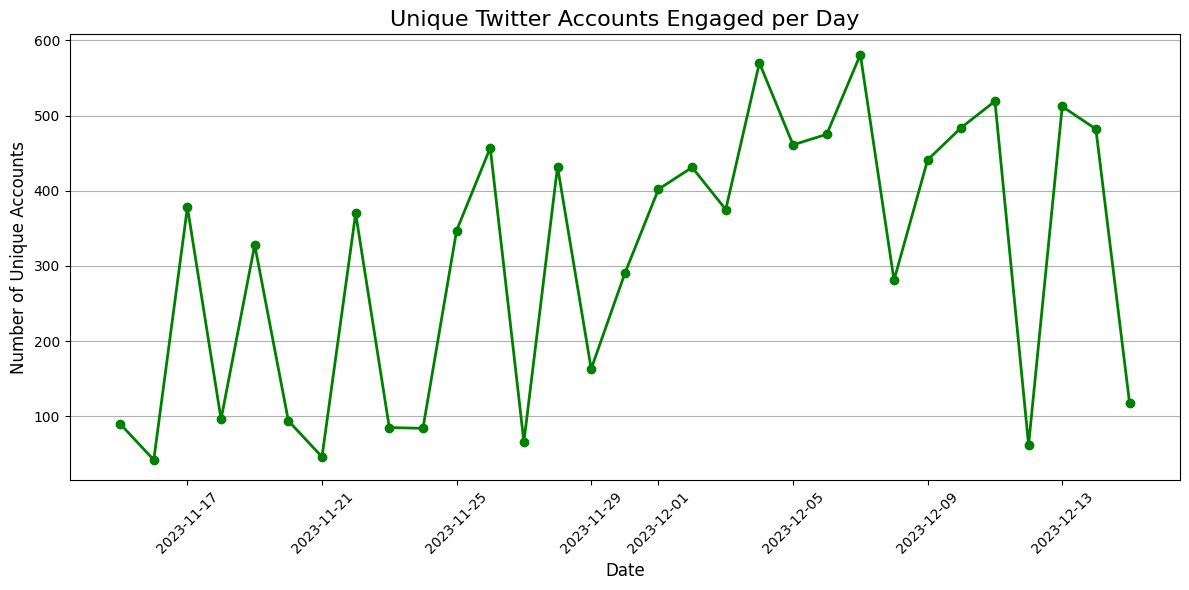

In [110]:
# Re-ensuring the 'created_at' feature is in the format of datetime data type
data['created_at'] = pd.to_datetime(data['created_at'])

# Grouping by 'created_at' and counting unique usernames to get the total accounts engaged each day
accounts_per_date = data.groupby(data['created_at'].dt.date)['username'].nunique()

plt.figure(figsize=(12, 6))

# Plotting the total accounts engaged per day
accounts_per_date.plot(kind='line', marker='o', linestyle='-', color='green', linewidth=2, markersize=6)

plt.title('Unique Twitter Accounts Engaged per Day', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Unique Accounts', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
